# 0. See what I can use after all.  I may not be able to get to that EEG data.

http://bnci-horizon-2020.eu/database/data-sets

- 20) ECoG-based BCI based on cognitive control (011-2015)
- 25) Upper limb movement decoding from EEG (001-2017)
- 26) Attempted arm and hand movements in persons with spinal cord injury (001-2019)

Open source - free to download

https://www.bbci.de/competition/iv/

- Data sets 4: ‹finger movements in ECoG› - discrimination requiring fine grained spatial resolution in ECoG

Note: sent email to gain access, but the data has been around for close to 12 years.  There is supposed to be an automatic email sent back to me that would allow me to download the ECoG data, but there is no guarantee that has been updated.  It hasn't come yet, so I may be locked out.



# 0+. I got the ECoG data after all!  Will be working with that set.

# 1. Learn how to import the data to an array (may need this in the future, I dunno) and a DataFrame.  Do a little data exploration while you're at it.

In [1]:
import mat4py

data = mat4py.loadmat('sub2_comp.mat')

In [2]:
type(data)

dict

In [3]:
len(data['train_data'])

400000

In [4]:
x = list(range(len(data['train_data'])))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

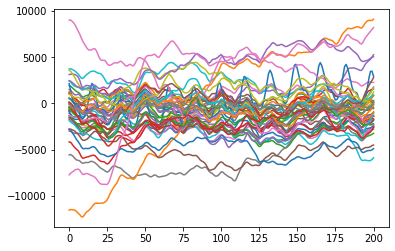

In [6]:
plt.plot(x[0:201], data['train_data'][0:201]);

## Yeah so, that doesn't look like what I expected. What's in this data exactly?

In [7]:
import pandas as pd

df = pd.DataFrame.from_dict(data['train_data'])

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-872,164,609,-4169,-3011,-1713,-1561,-616,-700,3692,...,961,-1881,-2825,-113,-495,76,2439,-2776,-7720,-96
1,-1191,-78,454,-4212,-3018,-1808,-1778,-597,-682,3733,...,916,-2019,-2935,-249,-700,-9,2380,-2787,-7544,-188
2,-1507,-395,204,-4429,-3134,-2046,-2065,-630,-826,3654,...,750,-2146,-3158,-437,-976,-218,2246,-2871,-7425,-418
3,-1670,-561,25,-4655,-3214,-2234,-2258,-602,-1037,3572,...,660,-2241,-3400,-551,-1151,-546,2111,-2931,-7292,-591
4,-1734,-625,-83,-4839,-3231,-2294,-2355,-535,-1269,3452,...,628,-2407,-3681,-645,-1248,-917,1955,-3040,-7180,-679


## Come to think of it, this does look right.  The description says I have 48 channels of data and each one should be its own EEG readout.  I shouldn't be surprised there is so much overlap.

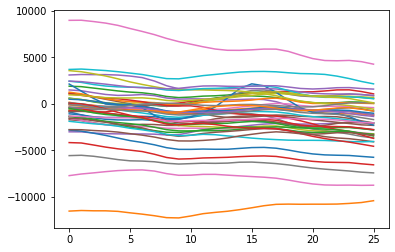

In [9]:
plt.plot(x[0:26], data['train_data'][0:26]);

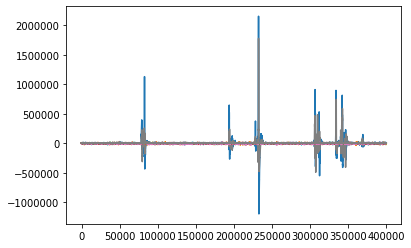

In [10]:
plt.plot(x, data['train_data']);

In [11]:
data.keys()

dict_keys(['train_data', 'test_data', 'train_dg'])

In [12]:
x = list(range(len(data['train_dg'])))

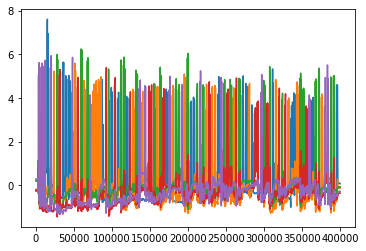

In [13]:
plt.plot(x, data['train_dg']);

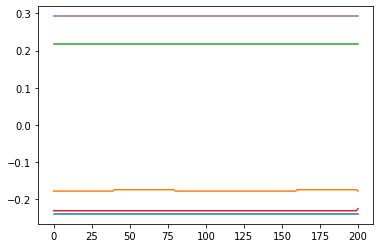

In [14]:
plt.plot(x[0:201], data['train_dg'][0:201]);

In [15]:
finger_data = []
finger2_data = []
finger3_data = []

for el in data['train_dg']:
    finger_data.append(el[0])
    finger2_data.append(el[1])
    finger3_data.append(el[2])

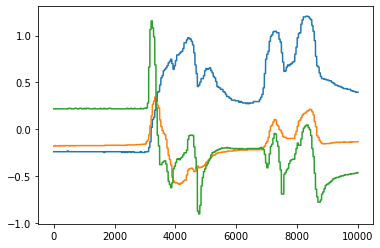

In [16]:
plt.plot(x[0:10000], finger_data[0:10000]);
plt.plot(x[0:10000], finger2_data[0:10000]);
plt.plot(x[0:10000], finger3_data[0:10000]);

In [17]:
true_labels = mat4py.loadmat('sub2_testlabels.mat')

In [18]:
true_labels

{'test_dg': [[0.06025004857492416,
   -0.1151816465880695,
   -0.05146667719197432,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004857492416,
   -0.11518145843295267,
   -0.051475260909008135,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004857492416,
   -0.11518089410534861,
   -0.05148427275887892,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004857492416,
   -0.1151799540185478,
   -0.051493713444410685,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004857492416,
   -0.11517863886153824,
   -0.0515035835618279,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004857492416,
   -0.11517694959925816,
   -0.051513883584830486,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004857492416,
   -0.11517618733546182,
   -0.051524613848592596,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004857492416,
   -0.11517498983607655,
   -0.0515357745337532,
   -0.3151590793507575,
   -0.249495654363256],
  [0.06025004

# 2. Immediate questions:

## How do I remove artifacts?  Do I remove artifacts?
- Can I use ICA for this?
- Are they even "artifacts"?  The really big ones are probably movement, honestly.

I should read about methods to do this here.
I should also read about whether or not this data is ALREADY filtered.

# 2.5 Answers to above questions

Data filtering: Sent through a bandpass of 0.15 to 200 Hz before being sampled at 1000 Hz.  NO mention of artifact detection or removal.

Artifact removal ideas (in no particular order)
- ICA
- CCA
- EMD/EEMD + ICA
- EMD/EEMD + CCA
- (IVA?)

Need to find frameworks for these.  If they don't exist and I have to program them myself, it might be a problem.

---

Update:
sklearn.decomposition.FastICA (https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)

sklearn.cross_decomposition.CCA (https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html)

PyEMD package for Python - I already have the documentation pdf downloaded (https://pypi.org/project/pyemd/) ***NOOOOOO IT'S NOT.  WRONG EMD.  Try pip install EMD-signal***

PyIVA package for Python - (https://github.com/zoisboukouvalas/pyiva)

Problems: EMD is going to work on only one channel at a time, so it may not be practical here.  For the three subjects, I have 62, 48 and 64 channels respectively.


# 3. Decision made.  I want to attempt ICA and CCA.  However, I will also try IVA if I have enough time.

## 3.1 ICA

What am I gonna do here...ok, all the reading I've done says trhat it may be easier if I have a visual demonstration or a visual heat map of the scalp to show the specific ICA channels that show artifacts. How is that even possible?

- That MNE package does python EEG visualizations. I should check there.
- None of that stuff matters if I can't find which channels were used and what their locations were.  I need to dig through that and answer this question.  In fact, I probably need to do this first.
- If it is not possible that I will be able to use this visual heat map, then I will have to use signal information only.  What methods do that?

## 3.1.1 Channel locations per patient

Soooooo, it doesn't appear that there is sufficient information on the llocations of the electrodes, so it will be difficult to use any kind of visual stimulus as an artifact indicator. I *could* draw a regular old heatmap?  The first and third patients surely have 8x8 arrays, while patient two has an 8x6.  The only problem is that I can't accurately tell which direction is which, I don't think.  Also, there are 2 electrodes "missing" from patient one, likely already removed for being dead channels as disclosed in the description of the dataset.  So questions:

1. Is it possible to glean information from a heat map?  I mean, if certain areas along an edge light up, does that mean that side is the front (suggesting an ocular artifact) or side (suggesting something muscular)?  
2. How do I make a determination on which 2 electrodes are missing?  Are they clearly labeled in the data?  I'm not sure here.

## 3.1.1.1 Creation of heat maps
Gotta test to see if I can even make a heat map.  Not sure of the process. I don't think I can overlay it on anything, but I just wanna see if it works.

In [19]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=64,max_iter=300)
icaSignal = ica.fit_transform(data['train_data'])

//anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:303: UserWarning: n_components is too large: it will be set to 48
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


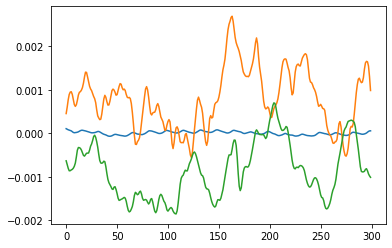

In [20]:
plt.plot(icaSignal[:,0:3][0:300]);

## 3.1.2 MNE package: advantages and limitations

In [21]:
!pip install -U mne

Requirement already up-to-date: mne in /anaconda3/lib/python3.7/site-packages (0.19.2)


MNE actually has a built-in ICA/topomap method where I can do the ICA in house and then show which channels look like what on a map of the scalp.  Gonna give that a shot here.  Worse comes to worse, I have already shown that I can break down the data using FastICA just through sklearn.  I think it'll be easier just to run it all through MNE though.

I have a list with the raw EEG data.  MNE uses a data construct called Raw, so I'll need to convert.  I found an example in the MNE doc, so I'll first convert to np.array and then to Raw so I can follow the example.

In [22]:
import mne
import numpy as np

In [23]:
type(data['train_data']), len(data['train_data'])

(list, 400000)

In [24]:
len(data['train_data'][0])

48

In [25]:
times = np.arange(0, 10, 0.001)  # Use 10000 samples (10s)

sin = np.sin(times * 10) 

In [26]:
train_array = pd.DataFrame.to_numpy(df.T)
sum(train_array[1]**2)

3496268449897

In [27]:
names = []
for num in range(1, 49):
    names.append(str(num))
    
types = []
for name in range(1, 49):
    types.append('eeg')
print(types, names)

['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg'] ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48']


In [28]:
# Initialize an info structure

info = mne.create_info(
    ch_names=names,
    ch_types=types,
    sfreq=1000
)

custom_raw = mne.io.RawArray(train_array, info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=48, n_times=400000
    Range : 0 ... 399999 =      0.000 ...   399.999 secs
Ready.
<RawArray  |  None, n_channels x n_times : 48 x 400000 (400.0 sec), ~146.6 MB, data loaded>


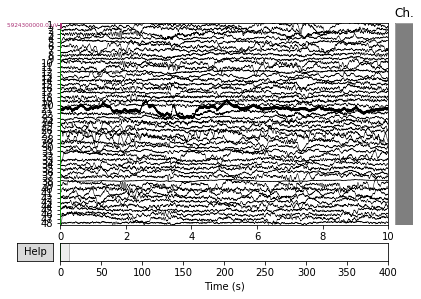

In [29]:
custom_raw.plot(n_channels=48, scalings='auto', title='Data from arrays',
         show=True, block=True);

IT WORKS

In [30]:
loc_array = []

for x in range(1,9):
    for y in range(1,7):
        loc_array.append((x, y))
        
loc_array = np.asarray(loc_array)

loc_array.shape
        

(48, 2)

In [31]:
ten_twenty_montage = mne.channels.make_standard_montage('GSN-HydroCel-64_1.0')
print(ten_twenty_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 64 channels>


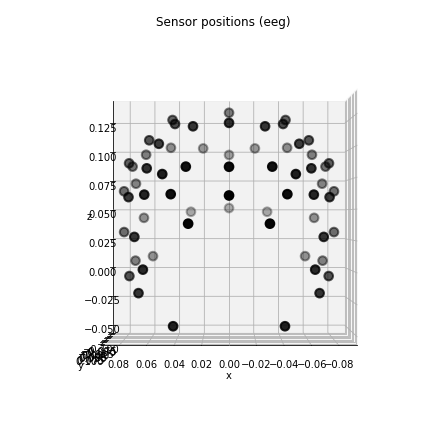

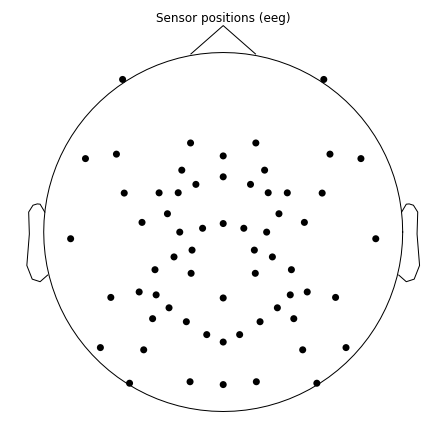

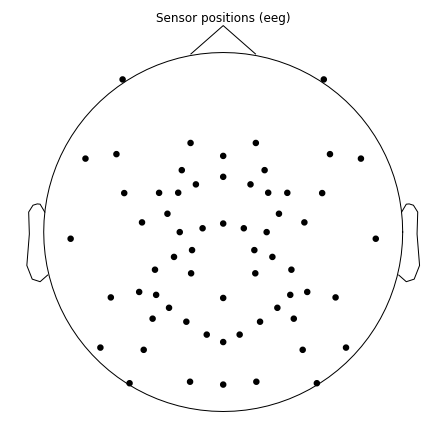

In [32]:
fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
ten_twenty_montage.plot(kind='topomap', show_names=False)

## 3.1.2.1 Conclusion

I don't know where these electrodes are placed.  So it's tough to come up with a layout that works, since I'd just be estimating already.  I know that patients 1 and 3 have 8x8 arrays (patient 1 has two electrodes not included - dunno where they are or why) and patient 2 has an 8x6 array.  I can really only guess at their locations.  Not great.  Also, the packages I'm downloading aren't *super* well documented and I'm having trouble getting things to line up and work properly.

So yeah cool. None of this is going to work.  Moving on.

## 3.1.3 Non-visual artifact removal methods
I found really interesting stuff regarding visual extraction!  Totally not gonna be able to do any of it!  Damn.  Ok, what about non-spatial, frequency-domain stuff?

Many of the review papers are saying things like "Correction is then conducted by removing the
independent components that resemble the artifact the
most before reconstructing of the output."

wat

Ok, new focus.  I want an automated method of removing artifacts.

# 3.2 Automated artifact removal

WPT-ICA/WPT-EMD methods as described in the automated artifact removal paper I found.

WPT can be done via PyWavelets.  ICA can be done via sklearn.  That is enough to start with WPT/ICA, so I won't worry about EMD for the moment.  I'll cross that bridge when I get to it.

In [33]:
import pywt



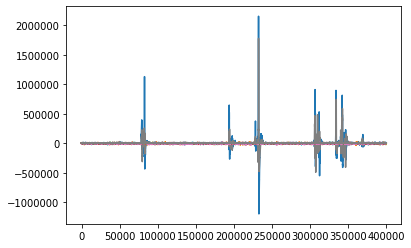

In [34]:
plt.plot(data['train_data']);

LAAAARGE spikes.  These are likely artifacts...my guess is movement or swinging of cables.  

From the mother wavelet selection paper, I'm going to use the sym9 wavelet for decomp purposes.  While this has been proven to be best for *their* dataset, it has not proven to be best for mine.  Still, gotta start somewhere.  If I can automate and speed up the WPT decomp process, then I can run some kind of fitness function on the other ones.  That's a sretch goal.  Let me just get this to work.

In [35]:
train_array[0]

array([ -872, -1191, -1507, ...,  1357,  1491,  1774])

In [36]:
len(train_array[0])

400000

In [37]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [38]:
pywt.dwt_max_level(len(train_array[0]), 'sym9')

14

In [39]:
from pywt import wavedec
coeffs = wavedec(train_array[0], 'sym9', level=7)

In [40]:
cA7, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

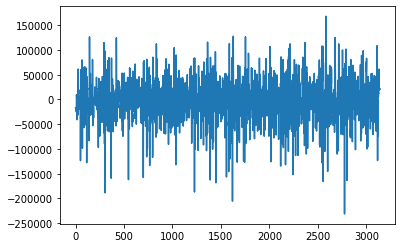

In [41]:
plt.plot(cA7)

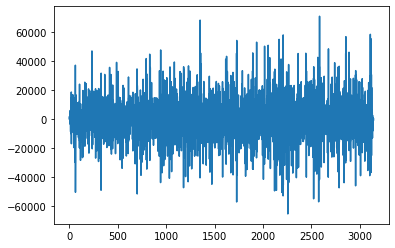

In [42]:
plt.plot(cD7)

Now I have the approximate function coefficients and 7 detail function coefficients.  Good start.

In [43]:
len(cA7), len(cD7), len(cD6), len(cD5), len(cD4), len(cD3), len(cD2), len(cD1)

(3141, 3141, 6266, 12516, 25015, 50014, 100012, 200008)

Never mind.  This is a form of decomposition, but I want the whole tree structure.

In [44]:
wp = pywt.WaveletPacket(data=train_array[0], wavelet='sym9', mode='symmetric')

In [45]:
print(wp.data)

[ -872 -1191 -1507 ...  1357  1491  1774]


In [46]:
print(wp.maxlevel)

14


In [47]:
for i in range(1, 8):
    nodes = [node.path for node in wp.get_level(i, 'natural')]

In [48]:
nodes

['aaaaaaa',
 'aaaaaad',
 'aaaaada',
 'aaaaadd',
 'aaaadaa',
 'aaaadad',
 'aaaadda',
 'aaaaddd',
 'aaadaaa',
 'aaadaad',
 'aaadada',
 'aaadadd',
 'aaaddaa',
 'aaaddad',
 'aaaddda',
 'aaadddd',
 'aadaaaa',
 'aadaaad',
 'aadaada',
 'aadaadd',
 'aadadaa',
 'aadadad',
 'aadadda',
 'aadaddd',
 'aaddaaa',
 'aaddaad',
 'aaddada',
 'aaddadd',
 'aadddaa',
 'aadddad',
 'aadddda',
 'aaddddd',
 'adaaaaa',
 'adaaaad',
 'adaaada',
 'adaaadd',
 'adaadaa',
 'adaadad',
 'adaadda',
 'adaaddd',
 'adadaaa',
 'adadaad',
 'adadada',
 'adadadd',
 'adaddaa',
 'adaddad',
 'adaddda',
 'adadddd',
 'addaaaa',
 'addaaad',
 'addaada',
 'addaadd',
 'addadaa',
 'addadad',
 'addadda',
 'addaddd',
 'adddaaa',
 'adddaad',
 'adddada',
 'adddadd',
 'addddaa',
 'addddad',
 'addddda',
 'adddddd',
 'daaaaaa',
 'daaaaad',
 'daaaada',
 'daaaadd',
 'daaadaa',
 'daaadad',
 'daaadda',
 'daaaddd',
 'daadaaa',
 'daadaad',
 'daadada',
 'daadadd',
 'daaddaa',
 'daaddad',
 'daaddda',
 'daadddd',
 'dadaaaa',
 'dadaaad',
 'dadaada',
 'da

In [49]:
wp[nodes[0]].data

array([-16905.95338536, -16867.23150174, -17304.03870327, ...,
        20996.52876541,  20401.61729037,  21069.49878989])

In [50]:
for i in range(128):
    print(len(wp[nodes[i]].data))
    
print(nodes[i])

3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
3141
ddddddd


Ok, I get it here.  Wavelet packet transform here is effectively splitting data into high and low frequency components.  The low frequency components are a's and the high frequency components are d's.  The higher frequency component portions are more likely to contain sudden changes in the EEG data, which would (at least somewhat) correspond to artifacts.  This paper "Hybrid Wavelet and EMD/ICA Approach for Artifact Suppression in Pervasive EEG" recommends splitting up to the 7th level, because this pretty granular.  If I start to remove the data at these nodes, I'm going to lose very little signal information overall.

Of note, the paper recommends using the mother wavelet "Dmey Wavelet of Discrete Meyer family" so if that option is available then that's what I will use ***NOTE: JUST CHECKED.  TOTALLY AVAILABLE.***  Splitting to level 7 was empirically chosen.  There is a trade-off between time localization and frequency localization so the more granular you get with one, the broader you will be with the other.  Level 7 was a good fit for them, so it's what I will use.  

There could absolutely be research done on wavelet fitness and level fitness, but that it going to be beyond the scope of what I'm doing here.

Now, I think what I need to do is create a small splitter function so I can call it for each channel.  I'm working with subject 2 so I have 48 to deal with. 

Also, quick note, the mode is how you pad either side of your wavelet.  The dmey wavelet is symmetric, so symmetric padding is preferred here (Keinert, Fritz. Wavelets and multiwavelets. Boca Raton, FL: Chapman & Hall/CRC Press, 2004. Print.)

In [51]:
wp = pywt.WaveletPacket(data=train_array[0], wavelet='dmey', mode='symmetric')
for i in range(1, 8):
    nodes = [node.path for node in wp.get_level(i, 'natural')]

In [52]:
wp[nodes[0]].data

array([-23242.68229527, -23931.35420882, -23409.30064221, ...,
        22570.05431653,  22117.47356065,  23068.54433737])

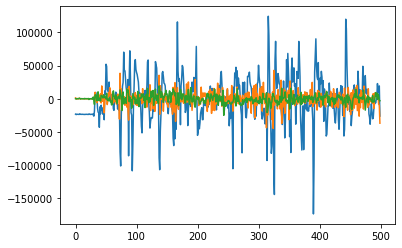

In [53]:
plt.plot(wp[nodes[0]].data[0:500])
plt.plot(wp[nodes[1]].data[0:500])
plt.plot(wp[nodes[3]].data[0:500]);

#completely useless plot, but pretty.  Ish.

In [54]:
def wpt_gather_all_nodes(data, level = 7):
    wp = pywt.WaveletPacket(data=data, wavelet='dmey', mode='symmetric')
    for i in range(1, level+1):
        nodes = [node.path for node in wp.get_level(i, 'natural')]
        
    return wp, nodes

wp, nodes = wpt_gather_all_nodes(train_array[20])

for n in nodes:
    print(wp[n].data)

[ -6145.20592124  -3689.7398018   -4897.01242449 ... -34003.94086192
 -32123.82648801 -34395.83281706]
[  904.18064616  -237.99945679   688.93315757 ...   897.64370598
  1199.66195768 -1281.3458001 ]
[-3120.26401036 -3784.16734617  -501.55980256 ...  -928.7107981
  1554.04336778  -442.37422195]
[ -146.64789716   121.24108827  -323.69737586 ...   877.01214924
   753.09074256 -1482.19368643]
[-1169.90273143    77.92568634  3107.74745636 ...  2126.98578808
  1916.55507218 -1064.36018191]
[ 322.79892613 -136.47254218  638.8626345  ... -764.9105433   867.36672865
  345.84954382]
[-257.63930431 4822.34775135 7723.85340986 ...  909.9313978  2174.45866294
 1251.43279027]
[ -221.04715387   418.42378946   -81.57242188 ...   681.48109649
 -1384.30923036  -493.61063463]
[ 5522.94076868 -7722.68600872  8022.77177092 ...  -101.75939742
  1093.40076583 -2526.01766371]
[ 1214.3548121   -264.40778067 -1254.73039381 ... -1983.20476558
 -2829.07242071 -3741.22539353]
[-1882.09012218  8559.55749182 -1629.

Excellent.  wpt_gather_all_nodes() works.  I'm going to need to run this for every single channel and then extrapolate the data for every single node.  How do I want to represent this data?  A matrix is probably the best idea.  I can have rows represent individual channels and I can have columns represent individual nodes.  I'll end up with a (channels) x (nodes) matrix where each matrix has the number of coefficients at that node.  So, for patient 2's training data, that's gonna be 48 x 128 x 3141, I think.

In [55]:
np.empty((len(data['train_data'][0]),len(nodes)))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
np.empty((len(data['train_data'][0]),len(nodes)))
wp[nodes[0]].data

array([ -6145.20592124,  -3689.7398018 ,  -4897.01242449, ...,
       -34003.94086192, -32123.82648801, -34395.83281706])

In [60]:
adjusted_array = np.stack(data['train_data'][:])

np.empty((len(data['train_data'][0]),len(nodes)))
wp[nodes[0]].data

num_of_channels = len(adjusted_array[:,20])
num_of_nodes = len(nodes)

sum_of_squares_matrix = np.zeros((len(adjusted_array[:,20]),len(nodes)))

for row in range(num_of_channels):
    wp, nodes = wpt_gather_all_nodes(train_array[row])
    for col in range(num_of_nodes):
        squares = np.sum((wp[nodes[col]].data)**2)
        sum_of_squares_matrix[row, col] = squares

sum_of_squares_matrix.shape
        
    

IndexError: index 48 is out of bounds for axis 0 with size 48

sum_of_squares_matrix is the EGY_c,node_i where (row, col) = (channel c, node i).  Terrific.  Now, let's calculate the average wavelet energy across each channel.

It will be average energy for each channel at each node, so I should have a vector of shape (1, 128).

In [ ]:
average_egy_vec = np.zeros([1, 128])

for col in range(128):
    average_egy_vec[0, col] = np.sum(sum_of_squares_matrix[:,col])/48

In [ ]:
average_egy_vec.shape

In [ ]:
var_egy_vec = np.empty([1, 128])

for col in range(128):
    diff = np.array(sum_of_squares_matrix[:, col]) - np.array(average_egy_vec[0, col]) 
    var_egy_vec[0, col] = (np.sum(diff**2))/47

In [ ]:
var_egy_vec

In [ ]:
plt.plot(wp[nodes[93]].data[0:500]);
plt.plot(wp[nodes[127]].data[0:500]);

The high variance channel to drop is the first one.  So it's position 0 and corresponds to 'aaaaaaa'.  The data at that node needs to be erased and then the whole signal reconstructed.

In [ ]:
new_wp = wp

In [ ]:
new_wp[nodes[0]] = np.zeros_like(wp[nodes[0]])
del new_wp[nodes[0]]

In [ ]:
new_wp_reconstructed = new_wp.reconstruct()

In [ ]:
new_wp_reconstructed

In [ ]:
plt.plot(new_wp_reconstructed)

In [ ]:
train_array

In [ ]:
new_wp_reconstructed

In [ ]:
# plt.plot(train_array[0])
plt.plot(new_wp_reconstructed)

That removed a LOT of the amplitude.  Interesting and possibly very effective.  I think this is a good start and I can move on to the ICA or EMD.  I am thinking ICA is an easier implementation, but I'm not really sure.  Plus, EMD worked better in the paper.  So I dunno.  Gotta pull the trigger on a decision.  Lemme read Bono a bit more and see what each entails.

In [ ]:
len(new_wp_reconstructed)

In [ ]:
len(data['train_data'])

In [ ]:
new_wp_reconstructed.reshape(400000)

This is actually a problem at this particular stage.  I'll need to WPT clean all the channels individually before running ICA or EMD.  So maybe...I should just run this anyway and see what happens?

I fully have a WPT algorithm.  I just need to make it repeatable.  Is hould organize it into a function, but that's not the first step I'm going to take today.  I'd like to run it through ICA.  And come to think of it, I should run an STFT and see what the 60 Hz noise is.  It needs to be dropped.

In [ ]:
from scipy.signal import stft, iirnotch, lfilter

b, a = iirnotch(60.0, 60.0, 1000)

In [ ]:
denoised = lfilter(b, a, train_array[0])

In [ ]:
# plt.plot(train_array[0,0:500]);
# plt.plot(denoised[0:500])
plt.plot(train_array[0][0:100])
plt.plot(denoised[0:100])

In [ ]:
plt.plot(train_array[0][0:19] - denoised[0:19])

# WRONG

Yeahhhhh...this looks wrong.  I'll need to attack iirnotch a little more to fix this.

In [ ]:
train_array[0][0:59]-denoised[0:59]

# WAIT...NOPE..THIS IS RIGHT

Ok, so I should likely remove the 60 Hz component beforehand (I am sure it's 60 Hz because the data was taken in Albany).  Next is to take the ICA or EMD.  I want to have this all done by the end of the week, so I think I'm going to spend time on the ICAs and then do the EMDs.  I want to have at least one ready to go.  But the VERY first thing is going to be doing the repeatable function.  I need to organize this better and hit each channel with the WPT cleaning method.  I think I *may* have done this already, but the Bono paper is a little confusing.  By end of tomorrow, I hope to have this sorted and then can work on ICA implementation.

## Iterate through all channels to remove 60 Hz interference
## Create function to automate the WPT cleaning process
## (Next is going to be to write basic ICA function, then automate as well)



After this, I'm ready to apply an ML algorithm.

# 4. Create functions

I can't really move much further until all of the original ideas are implemented.  So I need to create functions.

First, remove 60 Hz interference from each channel.
Second, run WPT cleaning on all channels.  Will need to make a decision on exactly what how to implement it.  I think I've done it correctly.

Still, first things first.

My data file is a dict with three keys: 'train_data', 'test_data', and 'train_dg'.

- data['train_data'] is a list of 400000 samples, each holding 48 channels of info. (eeg channels)

- data['test_data'] is a list of 200000 samples, each holding 48 channels of info. (eeg channels)

- data['train_dg'] is a list of 400000 samples, each holding 5 channels of info. (finger movements)

# 4.1 Create function to remove 60 Hz interference from all channels

In [61]:
def filter_elec_noise(w0, Q, fs, data):
    from scipy.signal import stft, iirnotch, lfilter
    
    # changes data from a list of arrays to a 2-D array
    # makes it easier to work with
    adjusted_array = np.stack(data[:])
    
    # initialize finalized array
    filtered_data = np.empty_like(adjusted_array)
    
    # parameters are w0 - freq. to remove, Q - quality, fs - sampling frequency of system
    b, a = iirnotch(w0, Q, fs)
    
    # application of filter to data
    for channel in range(adjusted_array.shape[1]): #48 channels
        denoised_channel = lfilter(b, a, adjusted_array[:,channel])
        for timepoint in range(adjusted_array.shape[0]): #400000 timepoints for training
            filtered_data[timepoint][channel] = denoised_channel[timepoint]
            
    return filtered_data, adjusted_array
            
            
filtered_data, adjusted_array = filter_elec_noise(60.0, 60.0, 1000, data['train_data'])


            
        
    
    
    
    
    

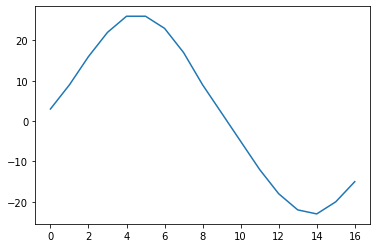

In [62]:
plt.plot((filtered_data[:,0] - adjusted_array[:,0])[0:17])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


(-5, 110)

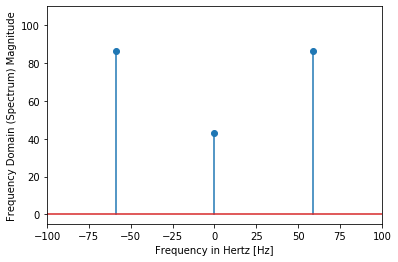

In [63]:
x = (filtered_data[:,47] - adjusted_array[:,47])[0:17]

from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * 1000

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-100, 100)
ax.set_ylim(-5, 110)

This clearly shows that the removed component (the difference from above) has mainly two frequency components, 0 Hz (fine) and 60 Hz (perfect).  Looks like the function behaves appropriately.

Also, you can't see it above but I checked different channels and the frequency content was still correct.

I've also got a way better-shaped array of data.  Let's see what it looks like.

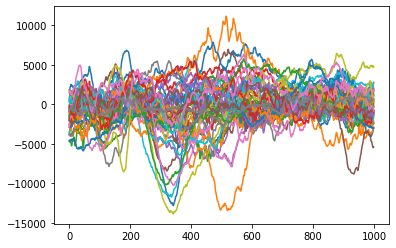

In [64]:
plt.plot(filtered_data[7000:8000, :]);

In [65]:
max(filtered_data[:,37])

1777407

In [66]:
for i in indices:
    print(max(filtered_data[:,i]))

NameError: name 'indices' is not defined

In [ ]:
plt.plot(filtered_data[:,20])
plt.plot(filtered_data[:,37])


In [67]:
indices = list(range(48))
indices.remove(20)
indices.remove(37)
indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47]

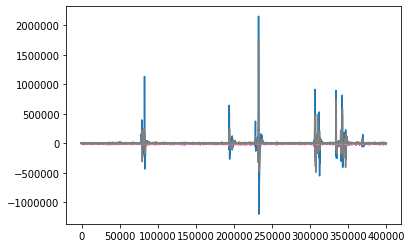

In [68]:
plt.plot(filtered_data[0:400000,0:48]);

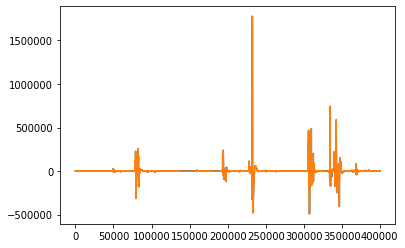

In [69]:
plt.plot(adjusted_array[:,37])
plt.plot(filtered_data[:,37])

Ok.  Here is my problem.  Channels 20 and 37 SUCK.  Massive artifacts that actually overlay each other in time.  Now I could do two things here:
    
1. Run my WPT and hope it identifies and tosses out these artifacts (should work in theory)
2. Junk the channels (will most DEFINITELY work in all practicality)
    
Because choice 2 is so much easier, I will of course be trying choice 1.  Ugh.

(400000, 48)

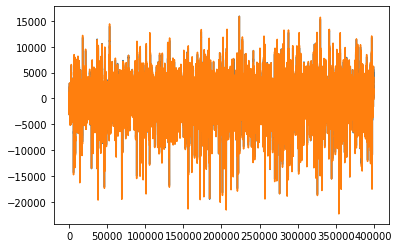

In [70]:
def wpt_gather_all_nodes(data, level = 7):
    wp = pywt.WaveletPacket(data=data, wavelet='dmey', mode='symmetric')
    for i in range(1, level+1):
        nodes = [node.path for node in wp.get_level(i, 'natural')]
        
    return wp, nodes

wp, nodes = wpt_gather_all_nodes(adjusted_array[:,0])
plt.plot(filtered_data[:,0])
plt.plot(wp.reconstruct())
adjusted_array.shape

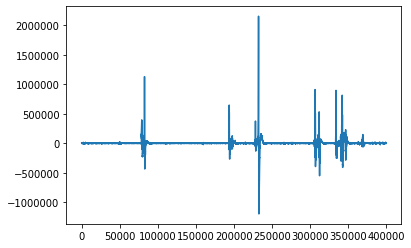

In [71]:
plt.plot(adjusted_array[:,20])

In [72]:
wp[nodes[col]].data.shape

(3185,)

In [73]:
num_of_channels = len(adjusted_array[20])

num_of_nodes = len(nodes)

sum_of_squares_matrix = np.zeros((num_of_channels,len(nodes)))

for channel in range(num_of_channels):
    wp, nodes = wpt_gather_all_nodes(adjusted_array[:,channel])
    for node in range(num_of_nodes):
        sum_of_squares_matrix[channel, node] = np.sum(wp[nodes[node]].data**2)

In [74]:
sum_of_squares_matrix.shape

(48, 128)

In [75]:
sum_of_squares_matrix.shape

(48, 128)

In [76]:
average_egy_vec = np.zeros([1, 128])

for col in range(128):
    average_egy_vec[0, col] = np.sum(sum_of_squares_matrix[:,col])/48
    
var_egy_vec = np.empty([1, 128])

for col in range(128):
    diff = np.array(sum_of_squares_matrix[:, col]) - np.array(average_egy_vec[0, col]) 
    var_egy_vec[0, col] = (np.sum(diff**2))/47

In [77]:
var_egy_vec

array([[2.26073936e+29, 3.01433026e+25, 1.02500468e+23, 6.35703939e+23,
        8.94090305e+20, 1.66265646e+21, 1.97883853e+22, 5.51453893e+21,
        4.22779135e+21, 3.43300993e+19, 1.95996658e+20, 6.25901929e+19,
        4.39718747e+20, 3.00571433e+20, 1.17760260e+20, 3.50860793e+20,
        7.02361794e+17, 7.50791721e+19, 2.69657067e+17, 2.36808881e+17,
        1.18930282e+18, 1.01005220e+18, 5.52242874e+17, 6.92632868e+17,
        1.06850744e+21, 2.23977513e+19, 5.34359849e+18, 9.86225823e+18,
        3.10682073e+18, 4.37968817e+18, 8.06944242e+18, 5.12595105e+18,
        1.06103012e+17, 2.55250315e+14, 7.71882326e+14, 4.79150398e+16,
        1.11514255e+15, 1.36500112e+15, 9.08221256e+14, 1.80674602e+15,
        6.35931615e+15, 7.53256720e+15, 4.40879360e+15, 1.22420235e+16,
        1.66950721e+16, 3.72761259e+15, 2.82612439e+15, 2.27320262e+15,
        3.80455548e+17, 1.63243028e+19, 1.96085703e+17, 2.79655028e+17,
        3.21210552e+16, 6.99260631e+16, 5.11975892e+16, 3.574959

In [78]:
new_wp[nodes[1]].data

NameError: name 'new_wp' is not defined

In [ ]:
wp_reconstructed = wp.reconstruct()
plt.plot(wp_reconstructed)
new_wp = wp
new_wp[nodes[0]].data = np.zeros_like(wp[nodes[1]].data)
new_wp_reconstructed = new_wp.reconstruct()
new_wp_reconstructed
plt.plot(new_wp_reconstructed)
new_wp[nodes[0]].data


In [ ]:
wp.reconstruct()-new_wp.reconstruct()

In [ ]:
del new_wp[nodes[0]].data
new_wp[nodes[0]].data
new_wp.reconstruct()

In [ ]:
wp20 = pywt.WaveletPacket(data=filtered_data[:,20], wavelet='dmey', mode='symmetric')
for i in range(1, 8):
    nodes = [node.path for node in wp.get_level(i, 'natural')]

In [ ]:
num_of_channels = len(adjusted_array[20])

num_of_nodes = len(nodes)

sum_of_squares_matrix = np.zeros((num_of_channels,len(nodes)))

for channel in range(num_of_channels):
    wp, nodes = wpt_gather_all_nodes(adjusted_array[:,channel])
    for node in range(num_of_nodes):
        sum_of_squares_matrix[channel, node] = np.sum(wp[nodes[node]].data**2)

In [79]:
sum_of_squares_matrix
sum_of_squares_matrix.shape

(48, 128)

In [80]:
average_egy_vec = np.zeros([1, 128])

for col in range(128):
    average_egy_vec[0, col] = np.sum(sum_of_squares_matrix[:,col])/48
    
var_egy_vec = np.empty([1, 128])

for col in range(128):
    diff = np.array(sum_of_squares_matrix[:, col]) - np.array(average_egy_vec[0, col]) 
    var_egy_vec[0, col] = (np.sum(diff**2))/47
    
var_egy_vec

array([[2.26073936e+29, 3.01433026e+25, 1.02500468e+23, 6.35703939e+23,
        8.94090305e+20, 1.66265646e+21, 1.97883853e+22, 5.51453893e+21,
        4.22779135e+21, 3.43300993e+19, 1.95996658e+20, 6.25901929e+19,
        4.39718747e+20, 3.00571433e+20, 1.17760260e+20, 3.50860793e+20,
        7.02361794e+17, 7.50791721e+19, 2.69657067e+17, 2.36808881e+17,
        1.18930282e+18, 1.01005220e+18, 5.52242874e+17, 6.92632868e+17,
        1.06850744e+21, 2.23977513e+19, 5.34359849e+18, 9.86225823e+18,
        3.10682073e+18, 4.37968817e+18, 8.06944242e+18, 5.12595105e+18,
        1.06103012e+17, 2.55250315e+14, 7.71882326e+14, 4.79150398e+16,
        1.11514255e+15, 1.36500112e+15, 9.08221256e+14, 1.80674602e+15,
        6.35931615e+15, 7.53256720e+15, 4.40879360e+15, 1.22420235e+16,
        1.66950721e+16, 3.72761259e+15, 2.82612439e+15, 2.27320262e+15,
        3.80455548e+17, 1.63243028e+19, 1.96085703e+17, 2.79655028e+17,
        3.21210552e+16, 6.99260631e+16, 5.11975892e+16, 3.574959

In [81]:
plt.plot(wp20.reconstruct())

NameError: name 'wp20' is not defined

In [82]:
plt.plot(wp20.reconstruct())
wp20[nodes[0]].data = np.zeros_like(wp20[nodes[0]].data)
plt.plot(wp20.reconstruct())
wp20[nodes[1]].data = np.zeros_like(wp20[nodes[1]].data)
plt.plot(wp20.reconstruct())
wp20[nodes[2]].data = np.zeros_like(wp20[nodes[2]].data)
plt.plot(wp20.reconstruct())
wp20[nodes[3]].data = np.zeros_like(wp20[nodes[3]].data)
plt.plot(wp20.reconstruct())

NameError: name 'wp20' is not defined

In [83]:
# plt.plot(adjusted_array[:,20])
plt.plot(wp20.reconstruct())


NameError: name 'wp20' is not defined

In [84]:
def node_with_max_std(data = filtered_data):
    
    wp, nodes = wpt_gather_all_nodes(data[:,0])
    
    num_of_channels = len(data[0,:])
    
    sum_of_squares_matrix = np.zeros((num_of_channels,len(nodes)))

    for channel in range(num_of_channels):
        wp, nodes = wpt_gather_all_nodes(data[:,channel])
        for node in range(len(nodes)):
            sum_of_squares_matrix[channel, node] = np.sum(wp[nodes[node]].data**2)

    average_egy_vec = np.zeros([1, 128])

    for col in range(128):
        average_egy_vec[0, col] = np.sum(sum_of_squares_matrix[:,col])/48
    
    var_egy_vec = np.empty([1, 128])

    for col in range(128):
        diff = np.array(sum_of_squares_matrix[:, col]) - np.array(average_egy_vec[0, col]) 
        var_egy_vec[0, col] = (np.sum(diff**2))/47
    
    return np.argmax(var_egy_vec)

node_with_max_std()

0

In [88]:
node_to_remove = node_with_max_std(filtered_data)

In [ ]:
wp0, nodes = wpt_gather_all_nodes(filtered_data[:,0])
wp20, nodes = wpt_gather_all_nodes(filtered_data[:,20])
wp37, nodes = wpt_gather_all_nodes(filtered_data[:,37])

In [ ]:

wp0[nodes[node_to_remove]].data = np.zeros_like(wp0[nodes[node_to_remove]].data)
wp20[nodes[node_to_remove]].data = np.zeros_like(wp20[nodes[node_to_remove]].data)
wp37[nodes[node_to_remove]].data = np.zeros_like(wp37[nodes[node_to_remove]].data)


NameError: name 'wp0' is not defined

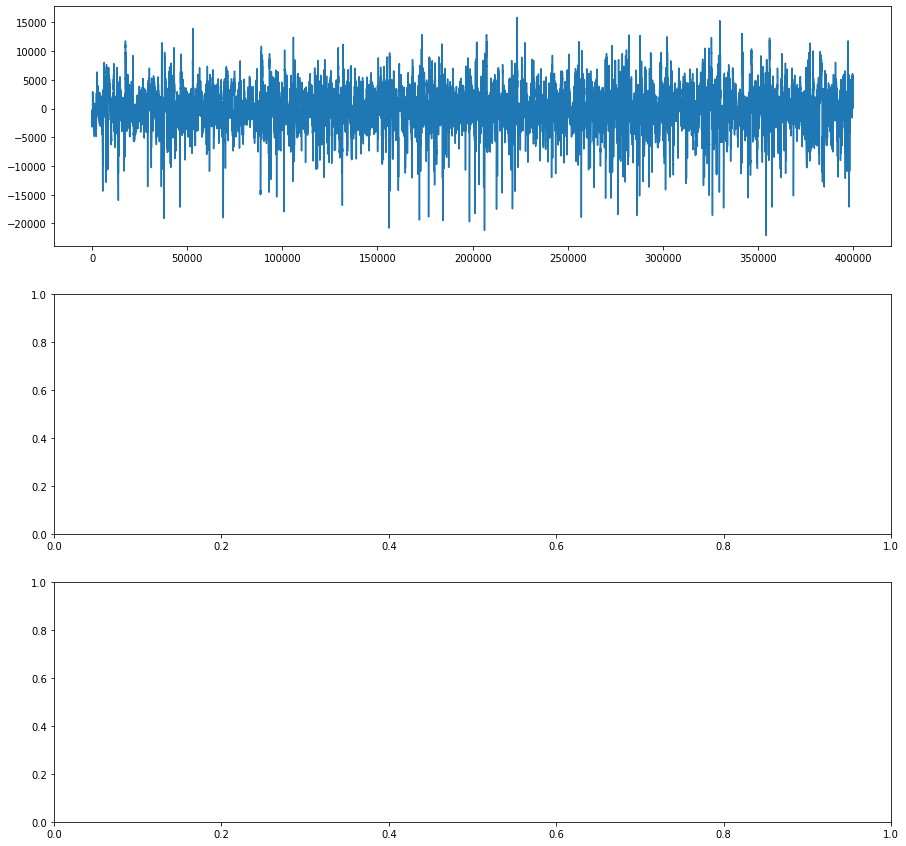

In [86]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
axes[0].plot(filtered_data[:,0])
axes[0].plot(wp0.reconstruct())
axes[1].plot(filtered_data[:,20])
axes[1].plot(wp20.reconstruct())
axes[2].plot(filtered_data[:,37])
axes[2].plot(wp37.reconstruct())
wp0.reconstruct().reshape(-1,1).shape

# This looks SUPER correct.  Major artifacts in channels 20 and 37 are heavily reduced.  

Data across the entirety of channel 0 has been changed as well, but this is to be expected to a certain extent.  After ICA/EMD, it remains to be seen how much predictive power there is.

I now need to right a reconstructed version of the channels without data at that node.

In [89]:
def drop_max_node(node_to_remove, data = filtered_data):

    dropped = np.empty_like(data)
    
    for channel in range(filtered_data.shape[1]):
        wp, nodes = wpt_gather_all_nodes(data[:,channel])
        wp[nodes[node_to_remove]].data = np.zeros_like(wp[nodes[node_to_remove]].data)
        dropped[:,channel] = wp.reconstruct()
        
    return dropped

wpt_filtered_data = drop_max_node(node_to_remove)
        
        
    

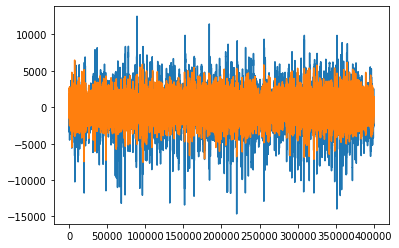

In [90]:
plt.plot(filtered_data[:,36])
plt.plot(wpt_filtered_data[:,36])

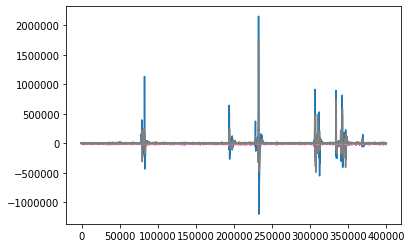

In [91]:
plt.plot(filtered_data);

plt.plot(wpt_filtered_data);

BIIIIIIG difference.  Look at the y axis.  Artifacts were reduced by a factor of anywhere from 2 to 10 in some cases.  Great start.

Note: 

# Done!  Now to attack EMDs!

In [ ]:
!pip install EMD-signal

# Never mind!  Time to attack ICAs!

At the end of the day, there are resting parameters in the threshold equation.  I don't really have access to which components of the system are "resting", if any...so ICA it is.

In [92]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=48,max_iter=300)
icaSignal = ica.fit_transform(wpt_filtered_data)

In [93]:
icaSignal.shape

(400000, 48)

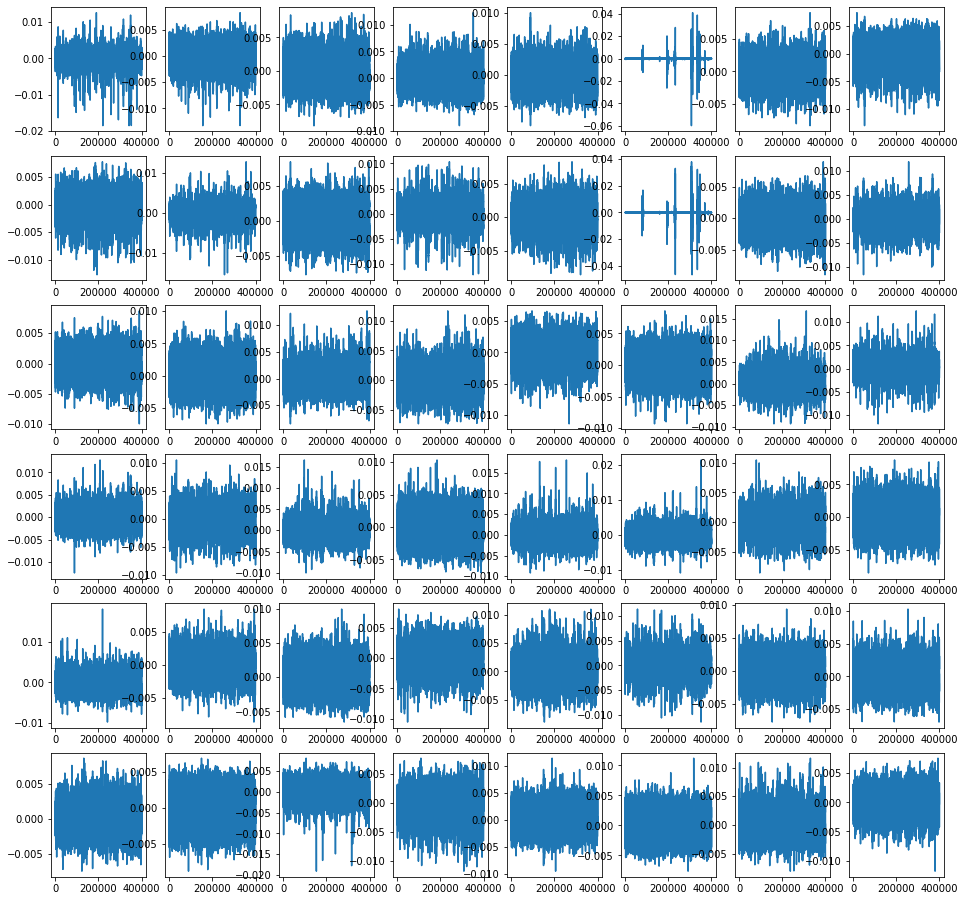

In [94]:
fig, axes = plt.subplots(6, 8, figsize=(16, 16))
for row in range(6):
    for col in range(8):
        axes[row][col].plot(icaSignal[:,(8*row)+col])

In [95]:
import scipy.stats as stats
stats.kurtosis(icaSignal[:,0]), stats.kurtosis(icaSignal[:,2])

(7.466727921759665, 0.8346521053843703)

In [96]:
kurtosis_stat = []
for channel in range(wpt_filtered_data.shape[1]):
    kurtosis_stat.append(stats.kurtosis(icaSignal[:,channel]))

In [97]:
kurtosis_stat


[7.466727921759665,
 1.810081759919136,
 0.8346521053843703,
 1.2496937097130543,
 0.7383638224479414,
 230.2383592236836,
 0.8755901697436563,
 1.6408401337014924,
 2.5148389928134858,
 4.155545746538904,
 0.7079905901355215,
 4.171664941364707,
 1.3178566702171493,
 164.25543834074804,
 0.7482293283012735,
 2.8302905549207997,
 1.0150631342923706,
 0.773501999174131,
 1.847462557581867,
 1.396198078875285,
 0.8616862237448824,
 0.9983172264392524,
 3.648405085564767,
 3.71090027006988,
 1.6843821504408973,
 1.4452423619429071,
 2.7817494395782525,
 0.4788958263948162,
 3.584224522186731,
 3.439249687652632,
 0.9889574068688836,
 0.923728724658412,
 1.6572350737086774,
 1.0412201731069475,
 0.4497520853244854,
 1.3791852308203891,
 1.9809884654267211,
 3.774121327853357,
 0.5409057006126705,
 0.7616115867422923,
 0.571641333177233,
 0.37012241749496866,
 2.6756502249169163,
 2.858202161870148,
 0.628824382699348,
 0.26606985781822345,
 1.8353481904466804,
 0.9665546590963348]

In [98]:
np.mean(kurtosis_stat)

9.935240866207797

In [99]:
import copy
updated_k_stat = copy.deepcopy(kurtosis_stat)

In [100]:
updated_k_stat[5] = 0
updated_k_stat[13] = 0
np.mean(updated_k_stat)

9.830942594400524

Ok, so clearly ICA components 2 and 11 are artifact-y.  The average of all the kurtosis stats sits at 9.902 until I remove those outliers, and then it drops down to 1.715!  With that in mind, note that component 42 has a kurtosis of 7.475, so it could be removed to better clean the set?  I say, let's not do that at the moment since it's iffy (so I will avoid messing with it), but drop the two ICA components 2 and 11 and reconstruct it.


EDIT: Should've known.  Upon re-run, these numbers are all a little different.  There is no native ordering really, so there are still 2 seriously way off channels, but they'll be numbered differently every time.

In [101]:
icaSignal[:, [5, 13]] = 0

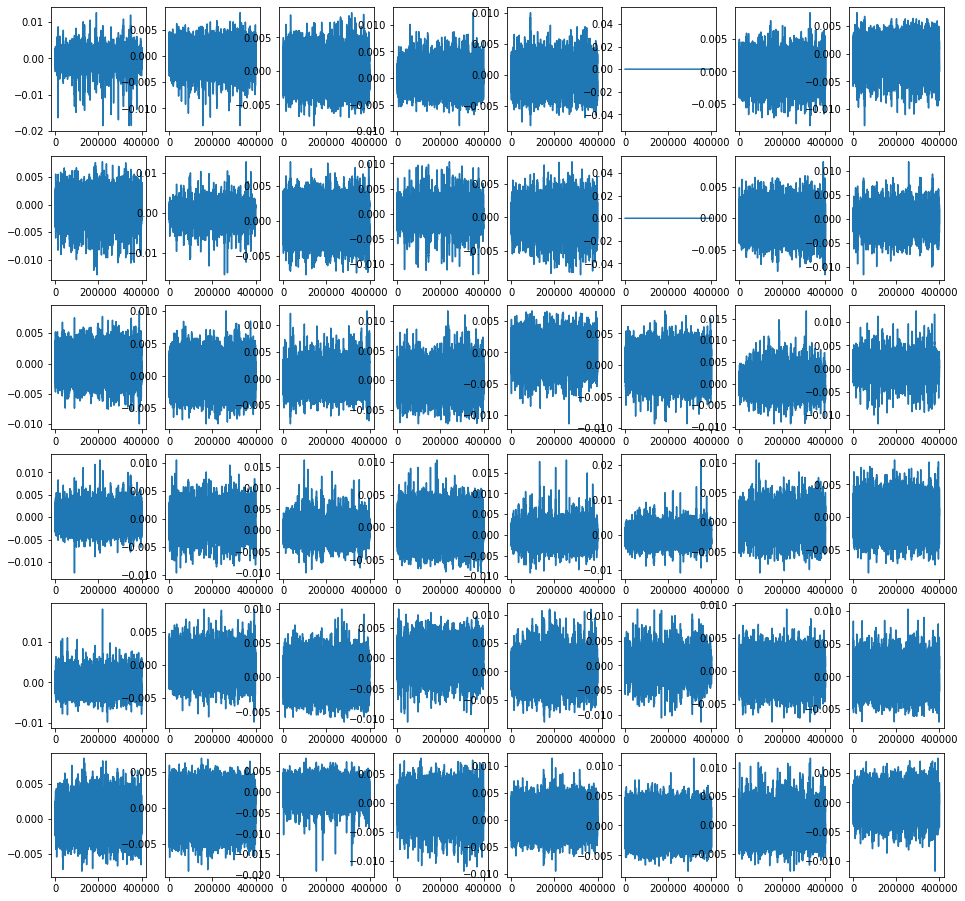

In [102]:
fig, axes = plt.subplots(6, 8, figsize=(16, 16))
for row in range(6):
    for col in range(8):
        axes[row][col].plot(icaSignal[:,(8*row)+col])

In [104]:
ica_wp_filtered_data = ica.inverse_transform(icaSignal)

Let's check those ugly channels 20 and 37 again.

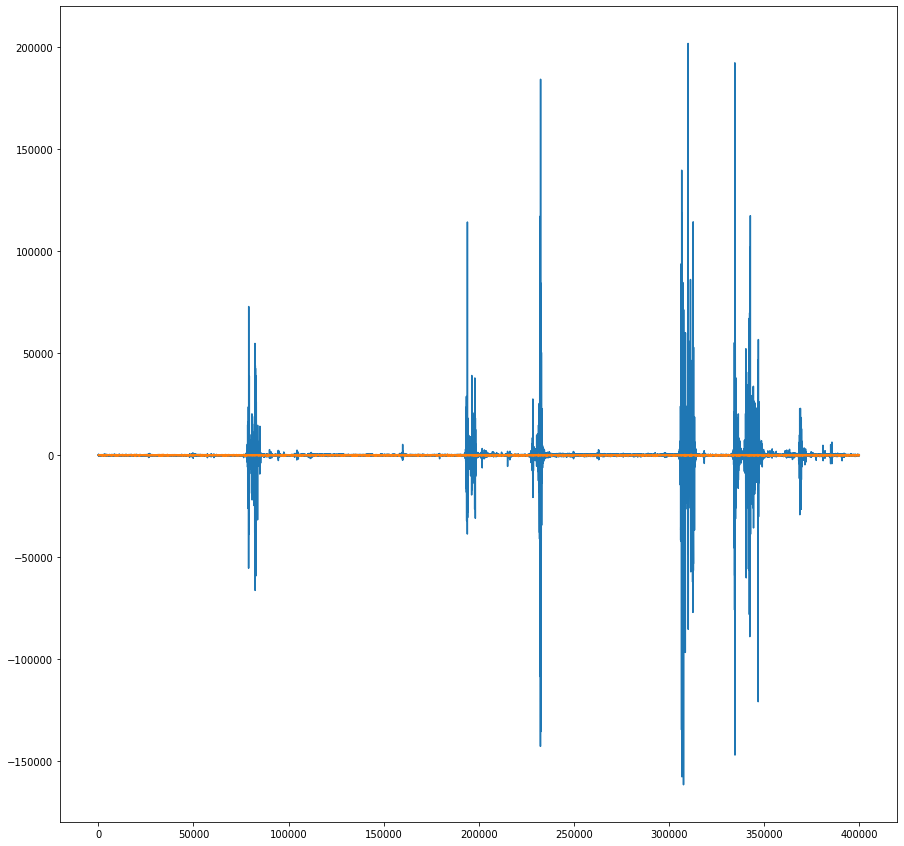

In [105]:
plt.figure(figsize=(15, 15))
plt.plot(wpt_filtered_data[:,37])
plt.plot(ica_wp_filtered_data[:,37])

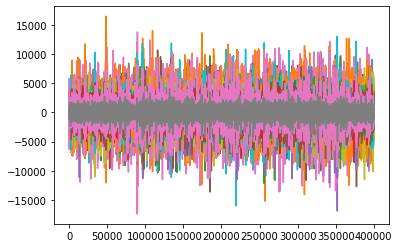

In [106]:
plt.plot(ica_wp_filtered_data);

# This CRUSHED the large spikes.  

Hopefully it removed some of the other artifacts as well, but I'm not convinced completely.  This part is a little subjective.  Either way, major progress!  Now it's time to figure out what kind of features I want to use.

# 5.  Shot in the dark and run a regression to find thumb position?

Let's just see where we're at using the raw data.

In [107]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [108]:

thumb_trainer = np.zeros((len(data['train_dg'])))

for timepoint in range(len(data['train_dg'])):
    thumb_trainer[timepoint] = data['train_dg'][timepoint][0]

In [109]:
ica_wp_filtered_data.shape
thumb_trainer.reshape(-1,1).shape

(400000, 1)

In [110]:
lreg.fit(ica_wp_filtered_data, thumb_trainer.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
lreg.score(ica_wp_filtered_data, thumb_trainer.reshape(-1,1))

1.4061073318138995e-05

In [112]:
thumb_pred = lreg.predict(ica_wp_filtered_data)

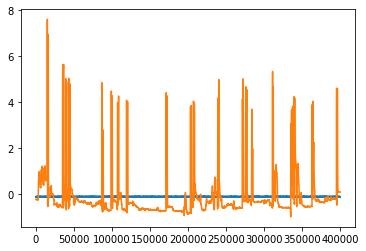

In [113]:
plt.plot(thumb_pred)
plt.plot(thumb_trainer)

This was just a shot in the dark and thank goodness because it's terrible.

Thoughts:
- Should this just be a classification?  Maybe regression is too hard.
- Papers mention a characteristic delay between brain activity and actual finger movement, somewhere around 200 ms.
- I need to learn more about feature selection.

# 5 New focus - build an RNN

Gonna need to figure out how to put the input data into the correct state.  Also need to figure out what the deal is with the overlap - the dataglove is only sampled at 25 Hz while the EEG is sampled at 1000 Hz, so maybe I have to go by 25 Hz "timesteps"? Need to make a decision on that.

I want to explore that a bit.

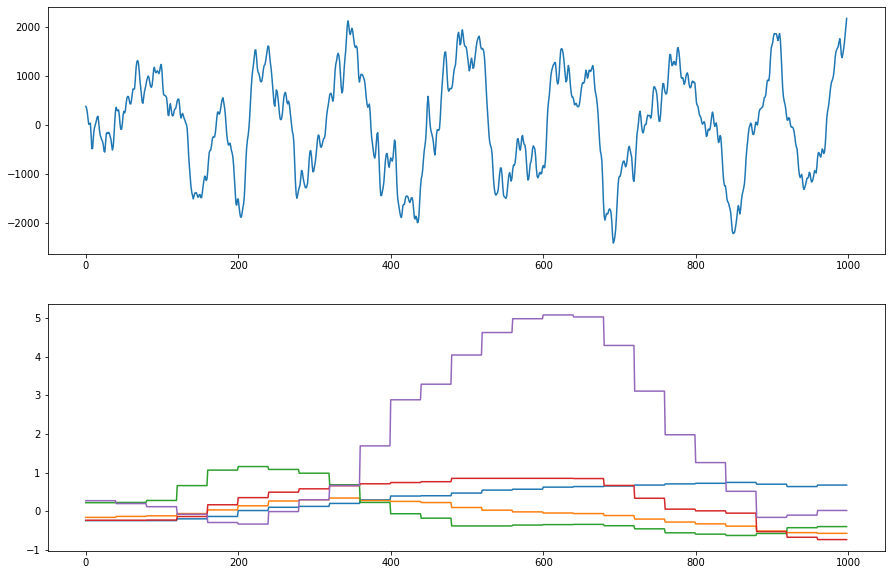

In [114]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
ax1.plot(ica_wp_filtered_data[:,0][3000:3999]);
ax2.plot(data['train_dg'][3000:3999]);

Do I need to downsample the DG?  Can I just take longer strides?  How do I put stride info into the input of an RNN that I want to build?  
***I don't.  The stride argument is for CNNs.  Lemme handle this by creating a downsampled DG and a mav correspondence of the EEG signal as a quick and dirty way to feature engineer something, line it up in time and then plug it into a not-quite-vanilla LSTM-RNN model.***

First, the "downsampled" dg:

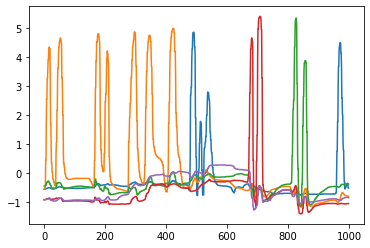

In [189]:
decimated_train_dg = data['train_dg'][0::25]
plt.plot(decimated_train_dg[3000:3999])

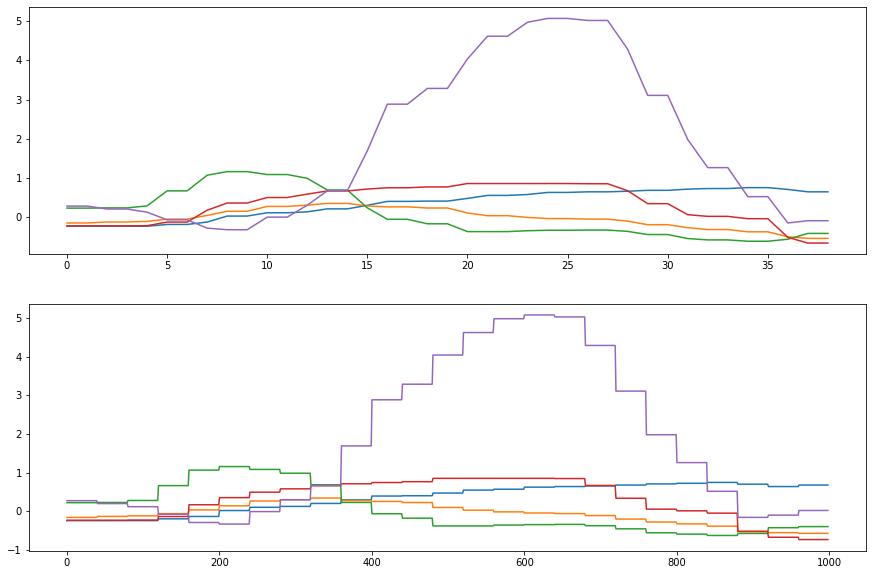

In [116]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
ax1.plot(decimated_train_dg[120:159]);
ax2.plot(data['train_dg'][3000:3999]);

Ok got it.  Now let's think about how to do the next part - the MAV of the EEG.  I want to say that I'd like 400 ms of prior data as an input at each cell.  So, the MAV for each timestep of the corresponding DG data is:

- 1st: MAV[EEG[0:399]] <--> dec_dg[15]
- 2nd: MAV[EEG[25:424]] <--> dec_dg[16]
- 3rd: MAV[EEG[50:499]] <--> dec_dg[17]<br>
\.<br>\.<br>\.
- 15985th: MAV[EEG[399600:399999]] <--> dec_dg[15999]

**EDIT - let's go back and change this.  I am not going to downsample the dg and check to see if the RNN trains a little better.  I think this is better for the model in general, honestly.**

In [197]:
mav_eeg = np.zeros((399600, 48))

In [198]:
ica_wp_filtered_data[0,:]

array([ 1388.13685349,  1436.09188563,   583.71130494,   302.45679058,
        -881.21840497,  -720.97255577,  1172.16235345,   821.04701198,
        1287.71475258,   394.50554224,  -421.86172005,   487.14494106,
        1162.21193646, -1386.26112466,  1854.46386623,  1442.06865129,
         185.78073535,   -29.64779227,   331.284791  ,  1506.44706382,
          91.54451879,   660.53822811,   995.09323047,  2986.45964524,
        2262.68735474,   895.94313571,  3603.38148485,  2952.54357883,
        2017.84621505,  1352.60890653,   554.90138361, -1510.83556512,
         685.19460625,  1542.80839652,   877.01541151,  2081.19303993,
        -452.13450239,   -45.71222181,   -86.61384152,   106.3143813 ,
        1781.36598973,   466.0974298 ,  1810.03540666,  3080.94343355,
         391.84452689,  -890.89224181, -2816.97916309,   782.08644781])

In [199]:
len(ica_wp_filtered_data[:,0])

400000

In [200]:
for timestep in range(mav_eeg.shape[0]):
    for channel in range(mav_eeg.shape[1]):
        mav_eeg[timestep, channel] = np.mean(ica_wp_filtered_data[timestep:timestep+400, channel])

In [201]:
mav_eeg

array([[-7.93290776e+01, -4.37413977e+01, -3.19374547e+01, ...,
         3.55216961e-02,  5.02274682e+01, -3.24554136e+01],
       [-8.05628617e+01, -4.61562020e+01, -2.95794064e+01, ...,
         5.57600382e-02,  5.19341178e+01, -3.52864534e+01],
       [-8.07753992e+01, -4.76507148e+01, -2.72541256e+01, ...,
         4.09164653e-01,  5.30927543e+01, -3.78508751e+01],
       ...,
       [ 1.15308733e+02,  1.09662246e+02,  2.90263890e+01, ...,
         8.11611887e+01,  1.51855011e+00,  1.46707304e+01],
       [ 1.14712269e+02,  1.08055268e+02,  3.34926517e+01, ...,
         7.97556982e+01,  2.18190637e+00,  1.52777033e+01],
       [ 1.14133647e+02,  1.06333165e+02,  3.75539815e+01, ...,
         7.77000244e+01,  2.68967609e+00,  1.58024511e+01]])

In [124]:
np.mean(ica_wp_filtered_data[0:400,0])

-79.32907755581769

In [125]:
len(ica_wp_filtered_data[0:400,0])

400

In [202]:
mav_eeg_reshaped = np.empty((399600), dtype = object)
feature_array_at_timepoint = np.zeros(48)

for timestep in range(mav_eeg.shape[0]):
    for channel in range(mav_eeg.shape[1]):
        feature_array_at_timepoint[channel] = mav_eeg[timestep, channel]
    mav_eeg_reshaped[timestep] = np.array(feature_array_at_timepoint)
    
mav_eeg.shape
    

(399600, 48)

In [206]:
len(data['train_data'])

400000

In [207]:
mav_eeg_reshaped.shape, mav_eeg_reshaped[0].shape, np.array(decimated_train_dg[15:]).shape

correct_input_size = mav_eeg.reshape(mav_eeg.shape[0], 1, mav_eeg.shape[1])
train_dg = np.array(data['train_dg'])
correct_output_size = train_dg[400:].reshape(train_dg.shape[0]-400, train_dg.shape[1])

print(correct_input_size.shape, correct_output_size.shape)

X = correct_input_size
y = correct_output_size

y[0:5]

(399600, 1, 48) (399600, 5)


array([[-0.24004879, -0.17490225,  0.21785755, -0.22600597,  0.29254389],
       [-0.24004879, -0.17490225,  0.21785755, -0.22600597,  0.29254389],
       [-0.24004879, -0.17490225,  0.21785755, -0.22600597,  0.29254389],
       [-0.24004879, -0.17490225,  0.21785755, -0.22600597,  0.29254389],
       [-0.24004879, -0.17490225,  0.21785755, -0.22600597,  0.29254389]])

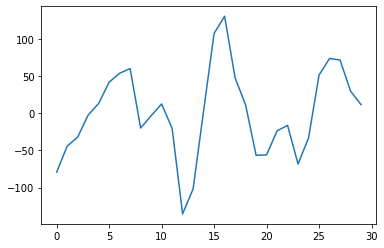

Looks good.  I need to build the RNN and run it now.

In [129]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

Using TensorFlow backend.


In [219]:
hidden_layers = 32

eeg_to_finger_model = Sequential()

eeg_to_finger_model.add(LSTM(hidden_layers, return_sequences = True))
eeg_to_finger_model.add(LSTM(hidden_layers))
eeg_to_finger_model.add(Dense(5))

eeg_to_finger_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

eeg_to_finger_model.fit(X,y, epochs = 30, batch_size = 200)


Epoch 1/30
399600/399600 [==============================] - 15s 37us/step - loss: 0.9831 - accuracy: 0.3056
Epoch 2/30
399600/399600 [==============================] - 15s 37us/step - loss: 0.9307 - accuracy: 0.3323
Epoch 3/30
399600/399600 [==============================] - 12s 29us/step - loss: 0.8975 - accuracy: 0.3379
Epoch 4/30
399600/399600 [==============================] - 18s 44us/step - loss: 0.8738 - accuracy: 0.3437
Epoch 5/30
399600/399600 [==============================] - 12s 31us/step - loss: 0.8558 - accuracy: 0.3478
Epoch 6/30
399600/399600 [==============================] - 11s 27us/step - loss: 0.8443 - accuracy: 0.3511
Epoch 7/30
399600/399600 [==============================] - 13s 33us/step - loss: 0.8359 - accuracy: 0.3514
Epoch 8/30
399600/399600 [==============================] - 21s 52us/step - loss: 0.8255 - accuracy: 0.3536
Epoch 9/30
399600/399600 [==============================] - 14s 36us/step - loss: 0.8159 - accuracy: 0.3564
Epoch 10/30
399600/399600 [=

In [220]:
trainPredict = eeg_to_finger_model.predict(X)

In [221]:
trainPredict.shape, y.shape

((399600, 5), (399600, 5))

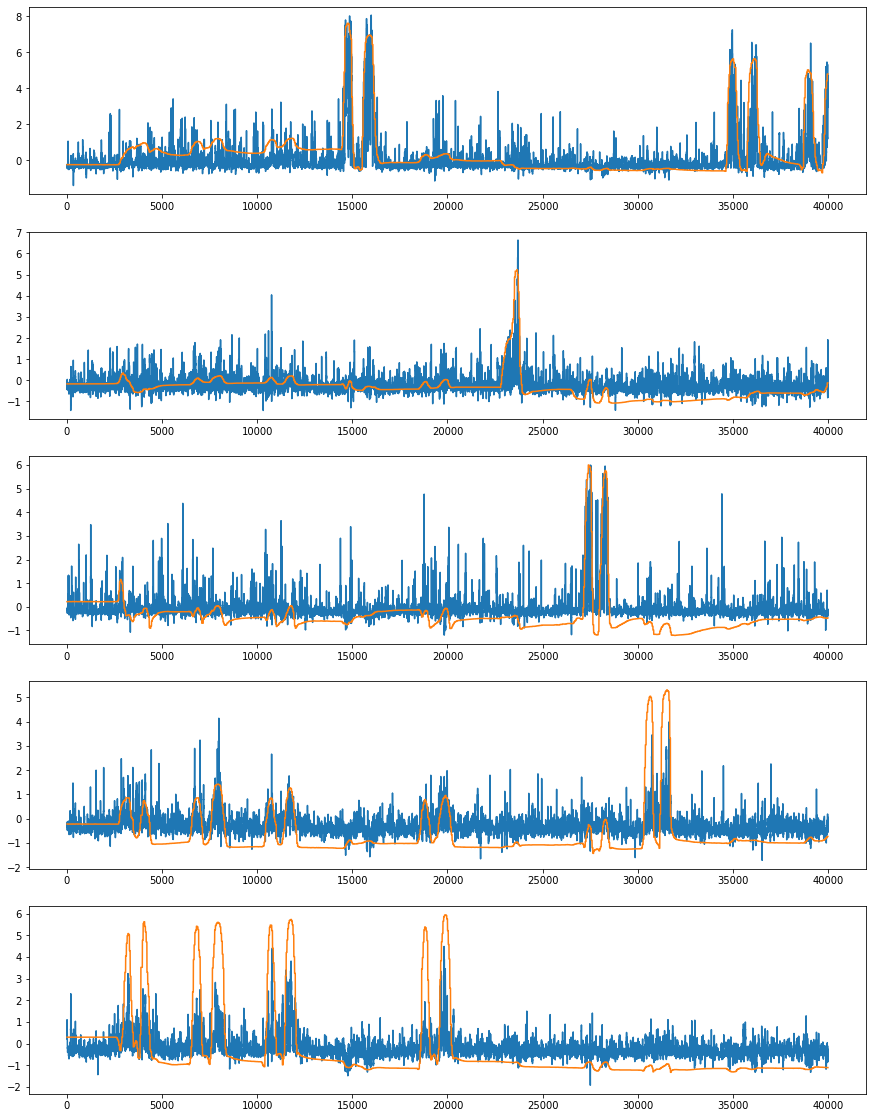

In [224]:

fig, axes = plt.subplots(5, 1, figsize=(15, 20));
axes[1].plot(trainPredict[0:40000,1]);
axes[1].plot(y[0:40000,1]);
axes[2].plot(trainPredict[0:40000,2]);
axes[2].plot(y[0:40000,2]);
axes[3].plot(trainPredict[0:40000,3]);
axes[3].plot(y[0:40000,3]);
axes[4].plot(trainPredict[0:40000,4]);
axes[4].plot(y[0:40000,4]);
axes[0].plot(trainPredict[0:40000,0]);
axes[0].plot(y[0:40000,0]);

# I BUILT AN RNN!  AND IT RUNS!  AND I GET RESULTS!  IT WAS A HORRIBLE EXPERIENCE AND ALSO IT IS TERRIBLE!

Shit.

Ok, so it sortakindasortaalmost gets a general idea of the output of the TRAINING data.  Out of curiosity, I'd like to run it on the test data to see what kind of a mess it is.

In [149]:
data = mat4py.loadmat('sub2_comp.mat')

In [150]:
data_test = data['test_data']


In [151]:
filtered_data_test, adjusted_array_test = filter_elec_noise(60.0, 60.0, 1000, data_test)

In [152]:
def node_with_max_std(data = filtered_data):
    
    wp, nodes = wpt_gather_all_nodes(data[:,0])
    
    num_of_channels = len(data[0,:])
    
    sum_of_squares_matrix = np.zeros((num_of_channels,len(nodes)))

    for channel in range(num_of_channels):
        wp, nodes = wpt_gather_all_nodes(data[:,channel])
        for node in range(len(nodes)):
            sum_of_squares_matrix[channel, node] = np.sum(wp[nodes[node]].data**2)

    average_egy_vec = np.zeros([1, 128])

    for col in range(128):
        average_egy_vec[0, col] = np.sum(sum_of_squares_matrix[:,col])/48
    
    var_egy_vec = np.empty([1, 128])

    for col in range(128):
        diff = np.array(sum_of_squares_matrix[:, col]) - np.array(average_egy_vec[0, col]) 
        var_egy_vec[0, col] = (np.sum(diff**2))/47
    
    return np.argmax(var_egy_vec)

node_with_max_std(filtered_data_test)

0

In [153]:
node_to_remove_test = node_with_max_std()

In [154]:
def drop_max_node(node_to_remove, data = filtered_data):

    dropped = np.empty_like(data)
    
    for channel in range(filtered_data.shape[1]):
        wp, nodes = wpt_gather_all_nodes(data[:,channel])
        wp[nodes[node_to_remove]].data = np.zeros_like(wp[nodes[node_to_remove]].data)
        dropped[:,channel] = wp.reconstruct()
        
    return dropped

wpt_filtered_data_test = drop_max_node(node_to_remove_test)

In [155]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=48,max_iter=300)
icaSignal_test = ica.fit_transform(wpt_filtered_data_test)

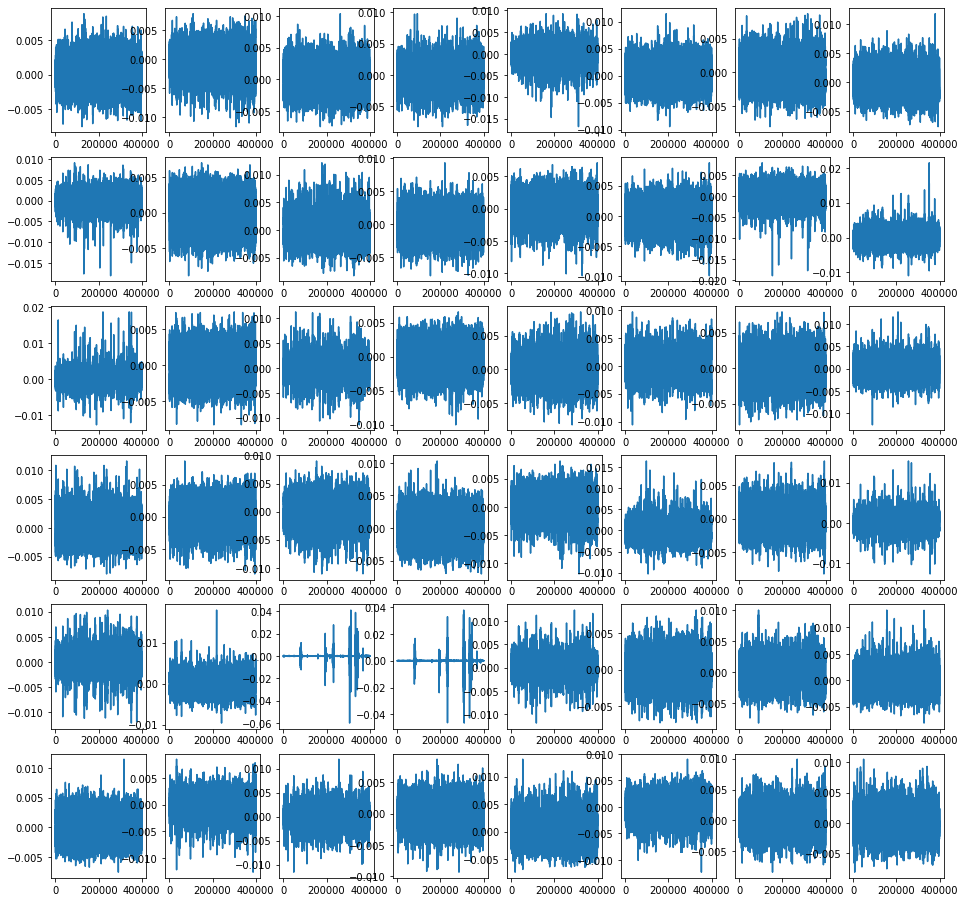

In [156]:
fig, axes = plt.subplots(6, 8, figsize=(16, 16))
for row in range(6):
    for col in range(8):
        axes[row][col].plot(icaSignal_test[:,(8*row)+col])

In [157]:
icaSignal_test[:, [34,35]] = 0

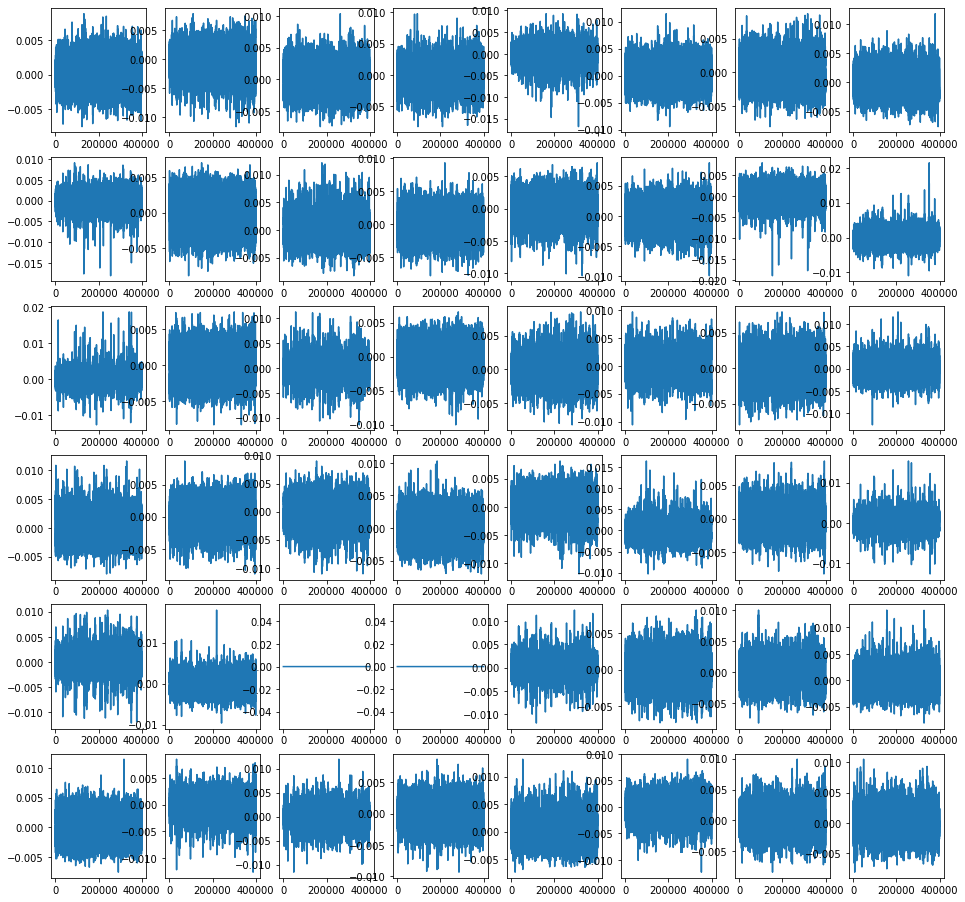

In [158]:
fig, axes = plt.subplots(6, 8, figsize=(16, 16))
for row in range(6):
    for col in range(8):
        axes[row][col].plot(icaSignal_test[:,(8*row)+col])

In [159]:
ica_wp_filtered_data_test = ica.inverse_transform(icaSignal)

In [160]:
dg_test = mat4py.loadmat('sub2_testlabels.mat')


In [161]:
test_dg = dg_test['test_dg']

In [162]:
mav_eeg_test = np.zeros((199601,48))

for timestep in range(mav_eeg_test.shape[0]):
    for channel in range(mav_eeg_test.shape[1]):
        mav_eeg_test[timestep, channel] = np.mean(ica_wp_filtered_data_test[(timestep):(timestep)+400, channel])

In [163]:
mav_eeg_test

array([[ 202.67124423,  116.14568675,   52.20386209, ...,   15.73815264,
          30.90060453,   23.97134927],
       [ 215.36975169,  129.18298722,   47.28386658, ...,   14.91139884,
          28.45533032,   25.11680209],
       [ 227.72657267,  140.92957587,   41.96375666, ...,   14.06712599,
          25.7571865 ,   26.15838871],
       ...,
       [ -54.66661501, -136.36112895,   -8.72497412, ...,  -40.44805467,
         115.01235834,  -39.62226832],
       [ -56.04424106, -132.70176723,   -9.65691905, ...,  -40.0336028 ,
         110.65343606,  -37.46503307],
       [ -58.9003128 , -129.79436363,  -10.58656045, ...,  -39.4086786 ,
         106.30313606,  -35.4396827 ]])

In [164]:
mav_eeg_test.shape, np.array(test_dg[399:]).shape

((199601, 48), (199601, 5))

In [165]:
test_dg = np.array(test_dg[399:])

In [166]:
mav_eeg_test.shape, test_dg.shape

((199601, 48), (199601, 5))

In [167]:


correct_input_size = mav_eeg_test.reshape(mav_eeg_test.shape[0], 1, mav_eeg_test.shape[1])


correct_output_size = test_dg

print(correct_input_size.shape, correct_output_size.shape)

X_test = correct_input_size
y_test = correct_output_size

y[0:5]

(199601, 1, 48) (199601, 5)


array([[-0.24004879, -0.17490225,  0.21785755, -0.23142546,  0.29254389],
       [-0.24004879, -0.17490225,  0.21785755, -0.22600597,  0.29254389],
       [-0.24004879, -0.17490225,  0.21785755, -0.22600597,  0.29254389],
       [-0.23239369, -0.17490225,  0.21785755, -0.23142546,  0.29254389],
       [-0.23239369, -0.17490225,  0.21785755, -0.23142546,  0.29254389]])

In [215]:
testPredict = eeg_to_finger_model.predict(X_test)
testPredict.shape, y_test.shape



((199601, 5), (199601, 5))

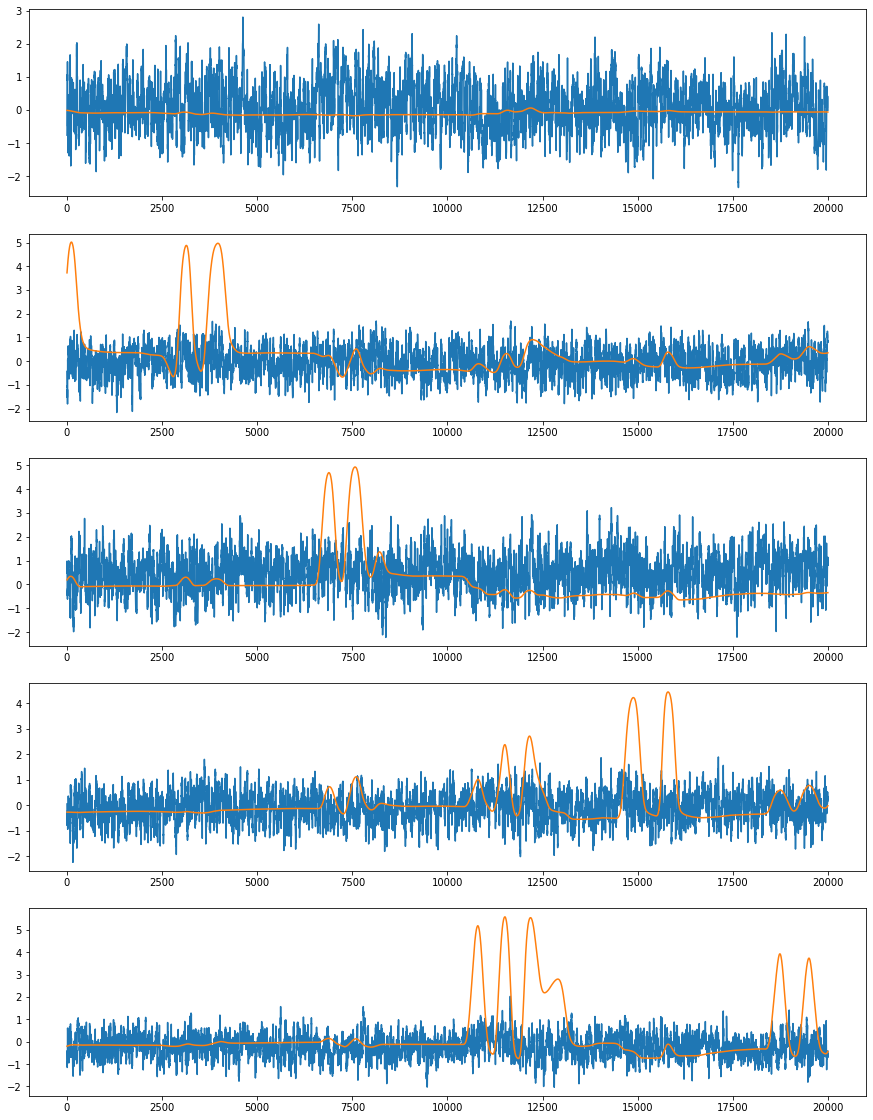

In [225]:
fig, axes = plt.subplots(5, 1, figsize=(15, 20));
axes[1].plot(testPredict[0:20000,1]);
axes[1].plot(y_test[0:20000,1]);
axes[2].plot(testPredict[0:20000,2]);
axes[2].plot(y_test[0:20000,2]);
axes[3].plot(testPredict[0:20000,3]);
axes[3].plot(y_test[0:20000,3]);
axes[4].plot(testPredict[0:20000,4]);
axes[4].plot(y_test[0:20000,4]);
axes[0].plot(testPredict[0:20000,0]);
axes[0].plot(y_test[0:20000,0]);

In [217]:
eeg_to_finger_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128)               90624     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 645       
Total params: 91,269
Trainable params: 91,269
Non-trainable params: 0
_________________________________________________________________


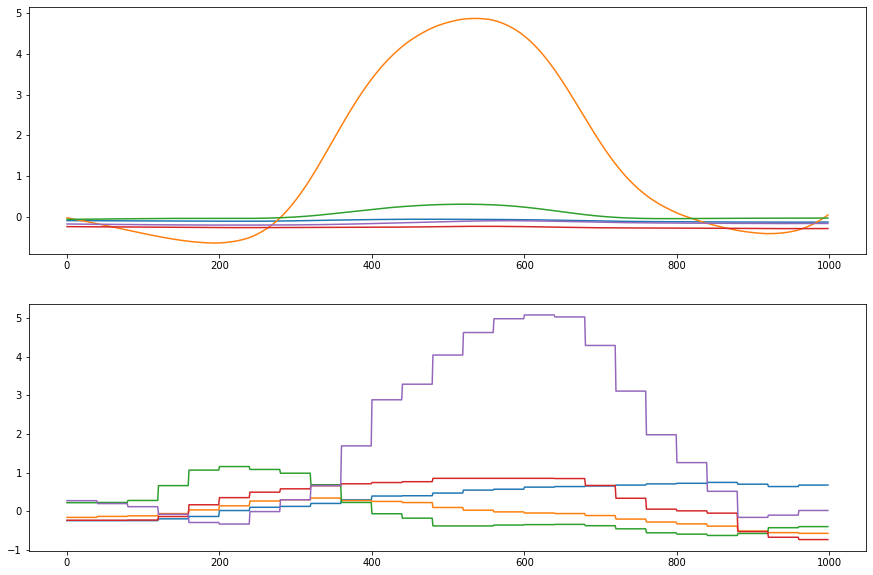

In [192]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
ax1.plot(true_labels['test_dg'][3000:3999]);
ax2.plot(data['train_dg'][3000:3999]);

In [195]:
len(true_labels['test_dg'])

200000

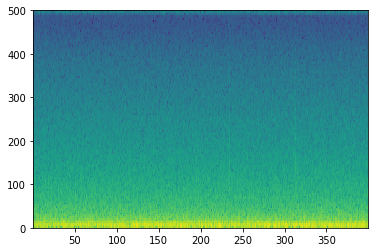

In [231]:
plt.specgram(mav_eeg[:,0], Fs=1000);

In [229]:
mav_eeg.shape

(399600, 48)

In [244]:
peak_eeg = np.zeros((399600, 48))

for timestep in range(peak_eeg.shape[0]):
    for channel in range(peak_eeg.shape[1]):
        peak_eeg[timestep, channel] = np.amax(ica_wp_filtered_data[timestep:timestep+400, channel])
    
peak_eeg[0]    

array([2304.47750899, 1443.30128374, 2276.07553592, 2958.87236533,
       2073.15409384, 2712.28482038, 1189.12638493, 2110.39938506,
       1445.13793853, 1945.10335323, 2516.97287287, 1649.70206008,
       1725.23247209, 1479.93082783, 1854.46386623, 1593.187728  ,
       1781.7111914 , 2179.32772187, 1937.94362685, 3206.19257602,
        368.73626826, 2350.39423186, 1190.04269277, 2986.45964524,
       2330.67602121, 2163.07650391, 4069.90584505, 4965.46996819,
       2017.84621505, 1352.60890653, 1335.364456  , 3784.0329679 ,
       2028.34688005, 1542.80839652, 2340.06939521, 2081.19303993,
       2670.64053055,  127.66794656, 2927.18384968, 3332.19127183,
       1781.36598973, 2423.90329107, 2832.86659852, 3388.12036622,
       1419.33815508, 2814.93642316, 5809.33408695,  911.71055136])

In [296]:
std_eeg = np.zeros((399600, 48))

for timestep in range(std_eeg.shape[0]):
    for channel in range(std_eeg.shape[1]):
        std_eeg[timestep, channel] = np.std(ica_wp_filtered_data[timestep:timestep+400, channel])
    
std_eeg[0] 

array([ 858.23430476,  656.17957282, 1110.0354679 , 1195.83980538,
        865.37780431, 1030.24563632,  613.07728912,  984.44811178,
        608.8834714 , 1055.48159366,  953.97423305,  726.26396848,
       1021.6543831 ,  670.19242394,  617.9001635 , 1029.56070687,
        520.71245836, 1014.60149572,  878.47996673,  989.40608902,
        178.95655464,  733.16249634,  609.50120426, 1416.5697468 ,
       1287.7820429 ,  920.11885704, 2194.61674658, 2614.15704258,
       1027.05592614,  724.40357769,  585.15329131, 1548.52143382,
        663.53968899,  597.57777909,  911.23824446,  861.00152054,
        873.26925248,   65.44212849, 1320.75381602, 1458.59070669,
        776.24392286,  849.29866235, 1187.40966687, 1014.25566127,
        979.9410907 , 1190.45660834, 2192.15108905,  454.55681598])

In [235]:
mav_eeg_reshaped = np.empty((399600, 48))

for timestep in range(mav_eeg.shape[0]):
    for channel in range(mav_eeg.shape[1]):
        feature_array_at_timepoint[channel] = mav_eeg[timestep, channel]
    mav_eeg_reshaped[timestep] = np.array(feature_array_at_timepoint)
    
mav_eeg.shape

features_reshaped = np.empty((399600), dtype = object)
feature_array_at_timepoint = np.zeros(96)

for timestep in range(mav_eeg.shape[0]):
    for channel in range(mav_eeg.shape[1]):
        feature_array_at_timepoint[channel] = mav_eeg[timestep, channel]
    for channel in range(peak_eeg.shape[1]):
        feature_array_at_timepoint[channel+48] = peak_eeg[timestep, channel]
    features_reshaped[timestep] = np.array(feature_array_at_timepoint)
    
mav_eeg.shape

(399600, 48)

In [248]:
peak_eeg

array([[2304.47750899, 1443.30128374, 2276.07553592, ..., 2814.93642316,
        5809.33408695,  911.71055136],
       [2304.47750899, 1443.30128374, 2276.07553592, ..., 2814.93642316,
        5809.33408695,  911.71055136],
       [2304.47750899, 1443.30128374, 2276.07553592, ..., 2814.93642316,
        5809.33408695,  911.71055136],
       ...,
       [1980.22324531, 2030.55228136, 1951.79078551, ..., 3108.74913183,
        1877.44882072, 1412.92477363],
       [1980.22324531, 2030.55228136, 1951.79078551, ..., 3108.74913183,
        1877.44882072, 1412.92477363],
       [1980.22324531, 2030.55228136, 1951.79078551, ..., 3108.74913183,
        1877.44882072, 1412.92477363]])

In [256]:
np.concatenate((mav_eeg, peak_eeg)).shape

(799200, 48)

In [297]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mav_eeg_scaled = scaler.fit_transform(mav_eeg)
print(mav_eeg_scaled)
peak_eeg_scaled = scaler.fit_transform(peak_eeg)
print(peak_eeg_scaled)
std_eeg_scaled = scaler.fit_transform(std_eeg)
print(std_eeg_scaled)

mav_eeg_reshaped = mav_eeg_scaled.reshape(399600, 1, 48)
peak_eeg_reshaped = peak_eeg_scaled.reshape(399600, 1, 48)
std_eeg_reshaped = std_eeg_scaled.reshape(399600, 1, 48)


feature_vector = np.concatenate((mav_eeg_reshaped, peak_eeg_reshaped), axis = 1)
feature_vector = np.concatenate((feature_vector, std_eeg_reshaped), axis = 1)

feature_vector.shape

[[0.41427418 0.42671117 0.45426471 ... 0.50518044 0.53399407 0.41342927]
 [0.41359969 0.42486175 0.45680122 ... 0.50519178 0.53478449 0.40860435]
 [0.41348349 0.42371715 0.45930249 ... 0.5053899  0.53532109 0.40423384]
 ...
 [0.52068067 0.54419818 0.51984253 ... 0.55065905 0.51143509 0.49374586]
 [0.52035459 0.54296744 0.52464681 ... 0.54987114 0.51174231 0.49478032]
 [0.52003827 0.54164854 0.52901552 ... 0.54871874 0.51197748 0.49567464]]
[[0.20351948 0.05386491 0.19746557 ... 0.22079777 0.50601315 0.11059034]
 [0.20351948 0.05386491 0.19746557 ... 0.22079777 0.50601315 0.11059034]
 [0.20351948 0.05386491 0.19746557 ... 0.22079777 0.50601315 0.11059034]
 ...
 [0.15384048 0.15746605 0.14434551 ... 0.25148609 0.10315407 0.25287928]
 [0.15384048 0.15746605 0.14434551 ... 0.25148609 0.10315407 0.25287928]
 [0.15384048 0.15746605 0.14434551 ... 0.25148609 0.10315407 0.25287928]]
[[0.10613348 0.05280435 0.16790423 ... 0.12966349 0.36104825 0.13226665]
 [0.10566323 0.05163467 0.1685146  ... 

(399600, 3, 48)

In [298]:
# correct_input_size = features_reshaped.reshape(features_reshaped.shape[0], 1, features_reshaped.shape[1])
correct_input_size = feature_vector.reshape(399600, 1, 48*3)
train_dg = np.array(data['train_dg'])
correct_output_size = train_dg[400:].reshape(train_dg.shape[0]-400, train_dg.shape[1])

print(correct_input_size.shape, correct_output_size.shape)

X = correct_input_size
y = correct_output_size

feature_vector[0,:,0]


(399600, 1, 144) (399600, 5)


array([0.41427418, 0.20351948, 0.10613348])

In [301]:
hidden_layers = 32

eeg_to_finger_model = Sequential()

# eeg_to_finger_model.add(LSTM(hidden_layers, return_sequences = True))
eeg_to_finger_model.add(LSTM(hidden_layers))
eeg_to_finger_model.add(Dense(5))

eeg_to_finger_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

eeg_to_finger_model.fit(feature_vector,y, epochs = 32, batch_size = 500)


trainPredict = eeg_to_finger_model.predict(feature_vector)
trainPredict.shape, y.shape

Epoch 1/32
399600/399600 [==============================] - 12s 31us/step - loss: 0.9458 - accuracy: 0.3297
Epoch 2/32
399600/399600 [==============================] - 12s 29us/step - loss: 0.8961 - accuracy: 0.3722
Epoch 3/32
399600/399600 [==============================] - 12s 30us/step - loss: 0.8602 - accuracy: 0.3918
Epoch 4/32
399600/399600 [==============================] - 12s 29us/step - loss: 0.8236 - accuracy: 0.4101
Epoch 5/32
399600/399600 [==============================] - 12s 29us/step - loss: 0.7852 - accuracy: 0.4238
Epoch 6/32
399600/399600 [==============================] - 12s 29us/step - loss: 0.7467 - accuracy: 0.4389
Epoch 7/32
399600/399600 [==============================] - 12s 31us/step - loss: 0.7112 - accuracy: 0.4519
Epoch 8/32
399600/399600 [==============================] - 12s 30us/step - loss: 0.6768 - accuracy: 0.4635
Epoch 9/32
399600/399600 [==============================] - 13s 31us/step - loss: 0.6433 - accuracy: 0.4751
Epoch 10/32
399600/399600 [=

((399600, 5), (399600, 5))

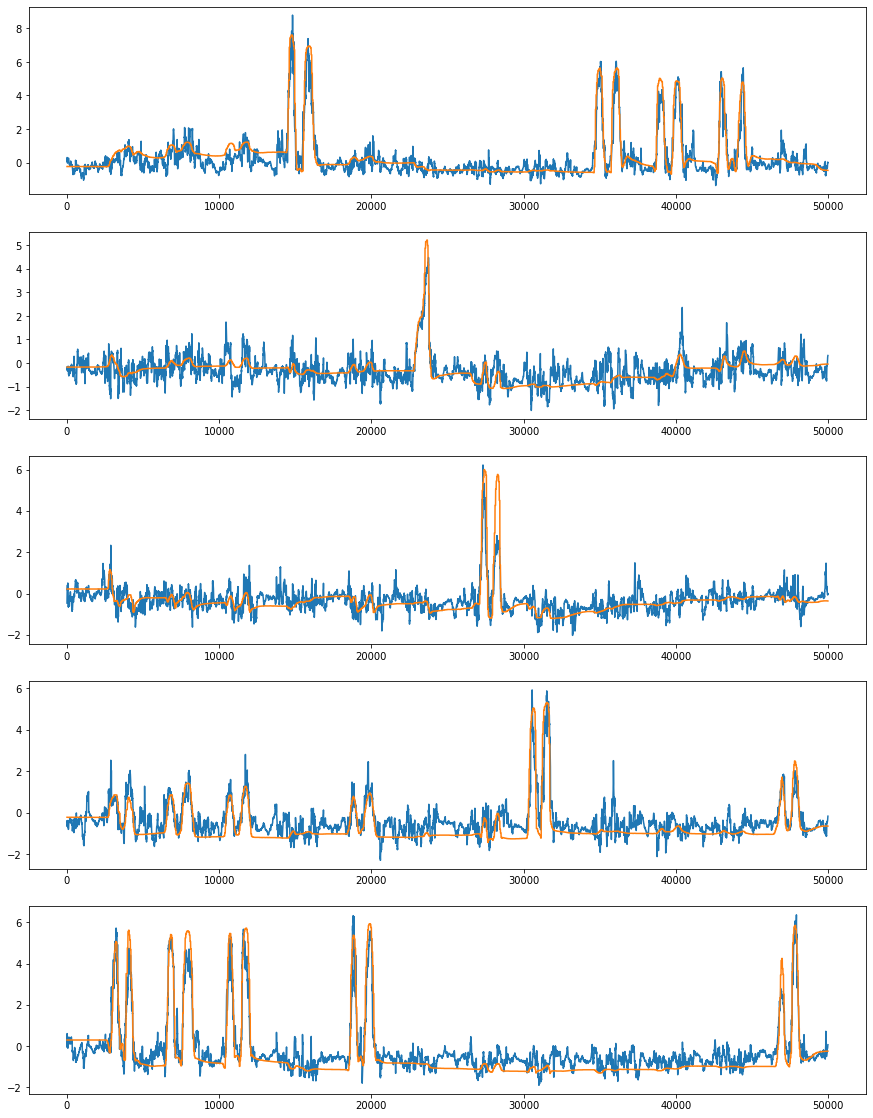

In [302]:
fig, axes = plt.subplots(5, 1, figsize=(15, 20));
axes[1].plot(trainPredict[0:50000,1]);
axes[1].plot(y[0:50000,1]);
axes[2].plot(trainPredict[0:50000,2]);
axes[2].plot(y[0:50000,2]);
axes[3].plot(trainPredict[0:50000,3]);
axes[3].plot(y[0:50000,3]);
axes[4].plot(trainPredict[0:50000,4]);
axes[4].plot(y[0:50000,4]);
axes[0].plot(trainPredict[0:50000,0]);
axes[0].plot(y[0:50000,0]);